In [1]:
import tracemalloc
import traceback

from utils_v1 import *


In [2]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential
from src.trainer.multioutput import TrainerMCDropout, TrainerSingleRun
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
import json
import pickle 
import src.trainer.evidential as evidential
from src.backend.Logger import Logger



In [3]:
'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''

site = 'PA'
# mode = 'mcd' # evidential, mcd, single_run
mode = 'single_run'

if mode == 'evidential':
	training = False
elif mode == 'mcd':
	training = False
elif mode == 'single_run':
	training = False
else:
	training = False
print("Mode: {}. Site: {}. Training: {}".format(mode, site, training))


Mode: single_run. Site: PA. Training: False


In [4]:

if site == 'PA':
	#dates = [2018, 2019]
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)			

	if mode == 'evidential':
		#exp_id_base = 148
		# exp_id_base = 155
		exp_id_base = 194
		exp_id_base = 198
		exp_id_base = 214

		# earlier date
		exp_id_base = 224
		exp_id_base = 194
	elif mode == 'mcd' or mode == 'single_run':
		exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

else:
	
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
		addPastDeforestationInput = True,
		borderBuffer = 2)	
	
	if mode == 'evidential':
		# MT
		exp_id_base = 196
	elif mode == 'mcd' or mode == 'single_run':
		exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117]

ic(dates)

if issubclass(type(dataset), MultipleDates):
	if mode == 'evidential':
		patchesHandler = PatchesHandlerEvidential(
			dataset)
	else:
		patchesHandler = PatchesHandlerMultipleDates(
			dataset)
		
else:
	patchesHandler = PatchesHandler()



ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| dates: [2018, 2019]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [5]:
# from enum import Enum
# UncertaintyMethod = Enum('Predictor', 'pred_var MI pred_entropy KL pred_entropy_single evidential')

In [6]:
config = {
    "training": training,
    "learning_rate": 1e-4,
    "weights": [0.1, 0.9, 0],
    "save_probabilities": False,
    "loadInference": False,
    "addPastDeforestationInput": True,
    "Uncertainty": {},
    "uncertainty_method": "",
    "evidence_function": evidential.relu_evidence
    }
if mode == 'evidential':
    config["inference_times"] = 1
    config['Uncertainty']['annealing_step'] = 10*375
    config['evidence_function'] = evidential.relu_evidence
    trainer_class = TrainerEvidential
    config['uncertainty_method'] = "evidential"
    config['classes_mode'] = None

    repetition_n = 10
    experiment_values = np.ones(repetition_n).astype(np.uint8)

    # experiment_values = [int(x) for x in experiment_values]

    exp_ids = range(exp_id_base, exp_id_base+len(experiment_values))

elif mode == 'mcd':
    config["inference_times"] = 10
    trainer_class = TrainerMCDropout
    config['uncertainty_method'] = "pred_entropy"
    config['classes_mode'] = True

elif mode == 'single_run':
    config["inference_times"] = 1
    trainer_class = TrainerSingleRun
    config['uncertainty_method'] = "per_entropy_single"
    config['classes_mode'] = False


In [7]:
config

{'training': False,
 'learning_rate': 0.0001,
 'weights': [0.1, 0.9, 0],
 'save_probabilities': False,
 'loadInference': False,
 'addPastDeforestationInput': True,
 'Uncertainty': {},
 'uncertainty_method': 'pred_entropy',
 'evidence_function': <function src.trainer.evidential.relu_evidence(logits)>,
 'inference_times': 1,
 'classes_mode': False}

In [8]:
exp_ids

[103, 104, 105, 106, 107, 118, 119, 120, 121, 122]

Beginning run number 0
D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp103/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161191379,   1924621], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161191379,   1924621], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161384703,   1731297], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162922676,    193324], dtype=int64))
ic| self.f1: 84.54, self.precision: 87.17, self.recall: 82.06
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9430607,)
ic| f1_val: 87.09
    precision_val: 84.22
    recall_val: 90.17
    mAP_val: 91.87


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162506439,    609561], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54145132,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54145132,) (54145132,)
0.841080483916035
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.004285987396271022
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1219929,)
    predicted_test_classified_incorrect.shape: (1219929,)
ic| TP_H + FN_H + FP_H + TN_H: 1219929
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1219929
    len(label_mask_current_deforestation_test): 54145132


[0.97035925 0.9333513  0.60674357 0.02253072 0.67654021 0.61128061
 0.13863523]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (813225,)
    predicted_test_classified_incorrect.shape: (813225,)
ic| TP_H + FN_H + FP_H + TN_H: 813225
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 813225
    len(label_mask_current_deforestation_test): 54145132


[0.93900553 0.92200914 0.70939126 0.01501936 0.598218   0.48246513
 0.16029901]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (1599767,)
    predicted_test_classified_incorrect.shape: (1599767,)
ic| TP_H + FN_H + FP_H + TN_H: 1599767
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1599767
    len(label_mask_current_deforestation_test): 54145132


[0.98764588 0.93820913 0.52002304 0.02954591 0.72453098 0.6744607
 0.11718088]
0.05473519870585886
threshold 0.05473519870585886


ic| label_current_deforestation_test_classified_incorrect.shape: (1988680,)
    predicted_test_classified_incorrect.shape: (1988680,)
ic| TP_H + FN_H + FP_H + TN_H: 1988680
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1988680
    len(label_mask_current_deforestation_test): 54145132


[0.9948642  0.93911858 0.43334868 0.03672869 0.7656169  0.71914321
 0.0987822 ]
0.09665514614523395
threshold 0.09665514614523395


ic| label_current_deforestation_test_classified_incorrect.shape: (1521475,)
    predicted_test_classified_incorrect.shape: (1521475,)
ic| TP_H + FN_H + FP_H + TN_H: 1521475
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1521475
    len(label_mask_current_deforestation_test): 54145132


[0.98471904 0.93737986 0.53716313 0.02809994 0.7159568  0.66397526
 0.12124983]
0.08257280939840696
threshold 0.08257280939840696


ic| label_current_deforestation_test_classified_incorrect.shape: (1647560,)
    predicted_test_classified_incorrect.shape: (1647560,)
ic| TP_H + FN_H + FP_H + TN_H: 1647560
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1647560
    len(label_mask_current_deforestation_test): 54145132


[0.98906635 0.93856852 0.50929944 0.03042859 0.72997089 0.68074542
 0.11471758]
0.08487620878441943
threshold 0.08487620878441943


ic| label_current_deforestation_test_classified_incorrect.shape: (1625387,)
    predicted_test_classified_incorrect.shape: (1625387,)
ic| TP_H + FN_H + FP_H + TN_H: 1625387
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1625387
    len(label_mask_current_deforestation_test): 54145132


[0.98842651 0.93846078 0.51435631 0.03001908 0.7274085  0.67776636
 0.11586478]
0.08506656373605025
threshold 0.08506656373605025


ic| label_current_deforestation_test_classified_incorrect.shape: (1623564,)
    predicted_test_classified_incorrect.shape: (1623564,)
ic| TP_H + FN_H + FP_H + TN_H: 1623564
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1623564
    len(label_mask_current_deforestation_test): 54145132


[0.98835535 0.9384306  0.51475021 0.02998541 0.72722605 0.67755047
 0.11595003]
0.08516209148125282
threshold 0.08516209148125282


ic| label_current_deforestation_test_classified_incorrect.shape: (1622647,)
    predicted_test_classified_incorrect.shape: (1622647,)
ic| TP_H + FN_H + FP_H + TN_H: 1622647
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1622647
    len(label_mask_current_deforestation_test): 54145132


[0.98833451 0.93842045 0.51497025 0.02996847 0.72710678 0.67742382
 0.11599751]
0.08498816897513024
threshold 0.08498816897513024


ic| label_current_deforestation_test_classified_incorrect.shape: (1624292,)
    predicted_test_classified_incorrect.shape: (1624292,)
ic| TP_H + FN_H + FP_H + TN_H: 1624292
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1624292
    len(label_mask_current_deforestation_test): 54145132


[0.98837792 0.93844698 0.51460623 0.02999886 0.72729591 0.67762473
 0.11591518]
0.08495483438121865
threshold 0.08495483438121865


ic| label_current_deforestation_test_classified_incorrect.shape: (1624621,)
    predicted_test_classified_incorrect.shape: (1624621,)
ic| TP_H + FN_H + FP_H + TN_H: 1624621
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1624621
    len(label_mask_current_deforestation_test): 54145132


[0.98838647 0.93844976 0.51452745 0.03000493 0.72733757 0.67767077
 0.1158982 ]
0.08502150356904184
threshold 0.08502150356904184


ic| label_current_deforestation_test_classified_incorrect.shape: (1623985,)
    predicted_test_classified_incorrect.shape: (1623985,)
ic| TP_H + FN_H + FP_H + TN_H: 1623985
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1623985
    len(label_mask_current_deforestation_test): 54145132
ic| self.threshold_optimal: 0.08498816897513024


[0.98837161 0.93844485 0.51467007 0.02999319 0.72726157 0.67758731
 0.11593198]
threshold 0.08498816897513024


ic| label_current_deforestation_test_classified_incorrect.shape: (1624292,)
    predicted_test_classified_incorrect.shape: (1624292,)
ic| TP_H + FN_H + FP_H + TN_H: 1624292
    len(label_mask_current_deforestation_test): 54145132
ic| TP_H + FN_H + FP_H + TN_H: 1624292
    len(label_mask_current_deforestation_test): 54145132


[0.98837792 0.93844698 0.51460623 0.02999886 0.72729591 0.67762473
 0.11591518]
threshold 0.08498816897513024
(54145132,) (54145132,)


ic| self.m_optimal: {'AA': array([0.02999886]),
                     'UEO': array([0.11591518]),
                     'f1': 84.54,
                     'f1_H': array([0.70158226]),
                     'f1_L': array([0.9627655]),
                     'precision_H': array([0.72729591]),
                     'precision_L': array([0.98837792]),
                     'recall_H': array([0.67762473]),
                     'recall_L': array([0.93844698]),
                     'recall_Ltotal': array([0.51460623])}
ic| self.m_audited_optimal: {'f1': array([0.97981831]),
                             'precision': array([0.99377647]),
                             'recall': array([0.96624682])}


cm_audited [[53404450     4455]
 [   24850   711377]]
[0.99377647 0.96624682]
Result idx 0: {'other_uncertainty_metrics': {'sUEO': 0.841080483916035, 'ece_score': 0.004285987396271022}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[2.48296e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.4554153]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.16695404]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9783321]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.37413326]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.81579924]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.98837792]), 'recall_L': array([0.93844698]), 'recall_Ltotal': array([0.51460623]), 

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp104/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161018218,   2097782], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161018218,   2097782], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161237653,   1878347], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162896565,    219435], dtype=int64))
ic| self.f1: 81.95, self.precision: 80.33, self.recall: 83.63
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9423838,)
ic| f1_val: 85.56
    precision_val: 80.7
    recall_val: 91.04
    mAP_val: 85.46


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162438489,    677511], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54127510,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54127510,) (54127510,)
0.8141570958729208
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.0053843853543005735
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1593153,)
    predicted_test_classified_incorrect.shape: (1593153,)
ic| TP_H + FN_H + FP_H + TN_H: 1593153
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1593153
    len(label_mask_current_deforestation_test): 54127510


[0.95145138 0.94738973 0.61278463 0.02943333 0.56295306 0.63292943
 0.13543126]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (1051381,)
    predicted_test_classified_incorrect.shape: (1051381,)
ic| TP_H + FN_H + FP_H + TN_H: 1051381
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1051381
    len(label_mask_current_deforestation_test): 54127510


[0.89546155 0.93849393 0.72554129 0.01942415 0.47980243 0.48823717
 0.1507989 ]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (2058173,)
    predicted_test_classified_incorrect.shape: (2058173,)
ic| TP_H + FN_H + FP_H + TN_H: 2058173
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 2058173
    len(label_mask_current_deforestation_test): 54127510


[0.97683317 0.94992008 0.50671536 0.03802453 0.63094616 0.70645544
 0.115845  ]
0.15234481420637816
threshold 0.15234481420637816


ic| label_current_deforestation_test_classified_incorrect.shape: (1510921,)
    predicted_test_classified_incorrect.shape: (1510921,)
ic| TP_H + FN_H + FP_H + TN_H: 1510921
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1510921
    len(label_mask_current_deforestation_test): 54127510


[0.94495177 0.94643021 0.63130251 0.02791411 0.54957179 0.61575368
 0.13871356]
0.13088686765562862
threshold 0.13088686765562862


ic| label_current_deforestation_test_classified_incorrect.shape: (1667986,)
    predicted_test_classified_incorrect.shape: (1667986,)
ic| TP_H + FN_H + FP_H + TN_H: 1667986
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1667986
    len(label_mask_current_deforestation_test): 54127510


[0.95688632 0.94803772 0.59608524 0.03081586 0.57446795 0.64712691
 0.13231485]
0.13758073275823626
threshold 0.13758073275823626


ic| label_current_deforestation_test_classified_incorrect.shape: (1617412,)
    predicted_test_classified_incorrect.shape: (1617412,)
ic| TP_H + FN_H + FP_H + TN_H: 1617412
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1617412
    len(label_mask_current_deforestation_test): 54127510


[0.95325882 0.94761824 0.60736323 0.02988151 0.56674591 0.63766855
 0.13442842]
0.13639756732335104
threshold 0.13639756732335104


ic| label_current_deforestation_test_classified_incorrect.shape: (1626109,)
    predicted_test_classified_incorrect.shape: (1626109,)
ic| TP_H + FN_H + FP_H + TN_H: 1626109
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1626109
    len(label_mask_current_deforestation_test): 54127510


[0.95388366 0.94768248 0.60535783 0.03004219 0.56816618 0.63940797
 0.13406166]
0.1349775634569797
threshold 0.1349775634569797


ic| label_current_deforestation_test_classified_incorrect.shape: (1636791,)
    predicted_test_classified_incorrect.shape: (1636791,)
ic| TP_H + FN_H + FP_H + TN_H: 1636791
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1636791
    len(label_mask_current_deforestation_test): 54127510


[0.95472895 0.94777876 0.602995   0.03023954 0.56972263 0.64140719
 0.13363977]
0.13657663795587063
threshold 0.13657663795587063


ic| label_current_deforestation_test_classified_incorrect.shape: (1624767,)
    predicted_test_classified_incorrect.shape: (1624767,)
ic| TP_H + FN_H + FP_H + TN_H: 1624767
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1624767
    len(label_mask_current_deforestation_test): 54127510


[0.95378914 0.94767524 0.60566478 0.0300174  0.56794859 0.63913995
 0.13411979]
0.13682962639606971
threshold 0.13682962639606971


ic| label_current_deforestation_test_classified_incorrect.shape: (1622950,)
    predicted_test_classified_incorrect.shape: (1622950,)
ic| TP_H + FN_H + FP_H + TN_H: 1622950
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1622950
    len(label_mask_current_deforestation_test): 54127510


[0.95367582 0.94767086 0.60610542 0.02998383 0.56761484 0.63874716
 0.13420396]
0.13711652349725104
threshold 0.13711652349725104


ic| label_current_deforestation_test_classified_incorrect.shape: (1620845,)
    predicted_test_classified_incorrect.shape: (1620845,)
ic| TP_H + FN_H + FP_H + TN_H: 1620845
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1620845
    len(label_mask_current_deforestation_test): 54127510


[0.95348837 0.94764806 0.60659244 0.02994494 0.56730325 0.63833336
 0.13427817]
0.13671097251628261
threshold 0.13671097251628261


ic| label_current_deforestation_test_classified_incorrect.shape: (1623823,)
    predicted_test_classified_incorrect.shape: (1623823,)
ic| TP_H + FN_H + FP_H + TN_H: 1623823
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1623823
    len(label_mask_current_deforestation_test): 54127510


[0.95372597 0.9476741  0.60592261 0.02999996 0.56775046 0.63890854
 0.13416097]
0.13667763715519787
threshold 0.13667763715519787


ic| label_current_deforestation_test_classified_incorrect.shape: (1624046,)
    predicted_test_classified_incorrect.shape: (1624046,)
ic| TP_H + FN_H + FP_H + TN_H: 1624046
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1624046
    len(label_mask_current_deforestation_test): 54127510


[0.95373874 0.94766975 0.60584485 0.03000408 0.56781609 0.63898397
 0.13414985]
0.13674430787736735
threshold 0.13674430787736735


ic| label_current_deforestation_test_classified_incorrect.shape: (1623590,)
    predicted_test_classified_incorrect.shape: (1623590,)
ic| TP_H + FN_H + FP_H + TN_H: 1623590
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1623590
    len(label_mask_current_deforestation_test): 54127510
ic| self.threshold_optimal: 0.13671097251628261


[0.95370828 0.94767116 0.60596081 0.02999565 0.56772886 0.63887754
 0.13417086]
threshold 0.13671097251628261


ic| label_current_deforestation_test_classified_incorrect.shape: (1623823,)
    predicted_test_classified_incorrect.shape: (1623823,)
ic| TP_H + FN_H + FP_H + TN_H: 1623823
    len(label_mask_current_deforestation_test): 54127510
ic| TP_H + FN_H + FP_H + TN_H: 1623823
    len(label_mask_current_deforestation_test): 54127510


[0.95372597 0.9476741  0.60592261 0.02999996 0.56775046 0.63890854
 0.13416097]
threshold 0.13671097251628261
(54127510,) (54127510,)


ic| self.m_optimal: {'AA': array([0.02999996]),
                     'UEO': array([0.13416097]),
                     'f1': 81.95,
                     'f1_H': array([0.60123136]),
                     'f1_L': array([0.9506904]),
                     'precision_H': array([0.56775046]),
                     'precision_L': array([0.95372597]),
                     'recall_H': array([0.63890854]),
                     'recall_L': array([0.9476741]),
                     'recall_Ltotal': array([0.60592261])}
ic| self.m_audited_optimal: {'f1': array([0.96850864]),
                             'precision': array([0.97048135]),
                             'recall': array([0.96654393])}


cm_audited [[53372939    21550]
 [   24524   708497]]
[0.97048135 0.96654393]
Result idx 1: {'other_uncertainty_metrics': {'sUEO': 0.8141570958729208, 'ece_score': 0.0053843853543005735}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[4.1643284e-09]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.4598863]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.27290606]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.95730126]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.5385467]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.9268831]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.95372597]), 'recall_L': array([0.9476741]), 'recall_Ltotal': array([0.60592261])

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp105/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161086764,   2029236], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161086764,   2029236], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161306413,   1809587], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162896351,    219649], dtype=int64))
ic| self.f1: 86.02, self.precision: 86.88, self.recall: 85.18
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9426726,)
ic| f1_val: 87.15
    precision_val: 83.58
    recall_val: 91.03
    mAP_val: 90.11


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162579301,    536699], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54124102,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54124102,) (54124102,)
0.8569092307938756
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.003562886009663188
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1054094,)
    predicted_test_classified_incorrect.shape: (1054094,)
ic| TP_H + FN_H + FP_H + TN_H: 1054094
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1054094
    len(label_mask_current_deforestation_test): 54124102


[0.95497173 0.94746587 0.68887556 0.0194755  0.62896214 0.59711311
 0.13729292]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (695674,)
    predicted_test_classified_incorrect.shape: (695674,)
ic| TP_H + FN_H + FP_H + TN_H: 695674
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 695674
    len(label_mask_current_deforestation_test): 54124102


[0.91866566 0.93898329 0.76871467 0.01285331 0.57852933 0.45843842
 0.14948367]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (1403735,)
    predicted_test_classified_incorrect.shape: (1403735,)
ic| TP_H + FN_H + FP_H + TN_H: 1403735
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1403735
    len(label_mask_current_deforestation_test): 54124102


[0.97795257 0.95142097 0.6057442  0.02593549 0.68159677 0.67735285
 0.11909948]
0.05473519870585886
threshold 0.05473519870585886


ic| label_current_deforestation_test_classified_incorrect.shape: (1764071,)
    predicted_test_classified_incorrect.shape: (1764071,)
ic| TP_H + FN_H + FP_H + TN_H: 1764071
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1764071
    len(label_mask_current_deforestation_test): 54124102


[0.98996536 0.95130444 0.50647322 0.03259308 0.73662274 0.73860236
 0.10132527]
0.04604867810963195
threshold 0.04604867810963195


ic| label_current_deforestation_test_classified_incorrect.shape: (1900875,)
    predicted_test_classified_incorrect.shape: (1900875,)
ic| TP_H + FN_H + FP_H + TN_H: 1900875
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1900875
    len(label_mask_current_deforestation_test): 54124102


[0.99250904 0.94995554 0.46533231 0.03512068 0.75546679 0.7576392
 0.09539236]
0.06841558457390301
threshold 0.06841558457390301


ic| label_current_deforestation_test_classified_incorrect.shape: (1591977,)
    predicted_test_classified_incorrect.shape: (1591977,)
ic| TP_H + FN_H + FP_H + TN_H: 1591977
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1591977
    len(label_mask_current_deforestation_test): 54124102


[0.9854154  0.95190512 0.5553725  0.02941346 0.7111815  0.71170279
 0.10948032]
0.0689401420404715
threshold 0.0689401420404715


ic| label_current_deforestation_test_classified_incorrect.shape: (1586260,)
    predicted_test_classified_incorrect.shape: (1586260,)
ic| TP_H + FN_H + FP_H + TN_H: 1586260
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1586260
    len(label_mask_current_deforestation_test): 54124102


[0.9852424  0.95192274 0.55701048 0.02930783 0.71025343 0.71068789
 0.10976928]
0.0645685637043089
threshold 0.0645685637043089


ic| label_current_deforestation_test_classified_incorrect.shape: (1636212,)
    predicted_test_classified_incorrect.shape: (1636212,)
ic| TP_H + FN_H + FP_H + TN_H: 1636212
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1636212
    len(label_mask_current_deforestation_test): 54124102


[0.98668073 0.95185889 0.54316702 0.03023075 0.71791222 0.71892196
 0.10729256]
0.06463538360486197
threshold 0.06463538360486197


ic| label_current_deforestation_test_classified_incorrect.shape: (1635374,)
    predicted_test_classified_incorrect.shape: (1635374,)
ic| TP_H + FN_H + FP_H + TN_H: 1635374
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1635374
    len(label_mask_current_deforestation_test): 54124102


[0.9866573  0.95186081 0.54340451 0.03021526 0.71778353 0.71878459
 0.10733336]
0.0659528722981361
threshold 0.0659528722981361


ic| label_current_deforestation_test_classified_incorrect.shape: (1619960,)
    predicted_test_classified_incorrect.shape: (1619960,)
ic| TP_H + FN_H + FP_H + TN_H: 1619960
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1619960
    len(label_mask_current_deforestation_test): 54124102


[0.98624271 0.95188851 0.54762635 0.02993047 0.71547162 0.7163221
 0.10809698]
0.06591953798656358
threshold 0.06591953798656358


ic| label_current_deforestation_test_classified_incorrect.shape: (1620365,)
    predicted_test_classified_incorrect.shape: (1620365,)
ic| TP_H + FN_H + FP_H + TN_H: 1620365
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1620365
    len(label_mask_current_deforestation_test): 54124102


[0.98624967 0.95188392 0.54751778 0.02993796 0.71553512 0.71639002
 0.10807442]
0.06550608231352673
threshold 0.06550608231352673


ic| label_current_deforestation_test_classified_incorrect.shape: (1625175,)
    predicted_test_classified_incorrect.shape: (1625175,)
ic| TP_H + FN_H + FP_H + TN_H: 1625175
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1625175
    len(label_mask_current_deforestation_test): 54124102


[0.98638301 0.95188279 0.54626928 0.03002683 0.71621278 0.71711603
 0.10783608]
0.06517350500077743
threshold 0.06517350500077743


ic| label_current_deforestation_test_classified_incorrect.shape: (1629015,)
    predicted_test_classified_incorrect.shape: (1629015,)
ic| TP_H + FN_H + FP_H + TN_H: 1629015
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1629015
    len(label_mask_current_deforestation_test): 54124102


[0.98647053 0.951872   0.54520127 0.03009777 0.7168145  0.71774347
 0.10764075]
0.0655762083707567
threshold 0.0655762083707567


ic| label_current_deforestation_test_classified_incorrect.shape: (1624352,)
    predicted_test_classified_incorrect.shape: (1624352,)
ic| TP_H + FN_H + FP_H + TN_H: 1624352
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1624352
    len(label_mask_current_deforestation_test): 54124102


[0.98635925 0.95188039 0.54648234 0.03001162 0.71609834 0.71699508
 0.10787576]
0.06566439457501204
threshold 0.06566439457501204


ic| label_current_deforestation_test_classified_incorrect.shape: (1623320,)
    predicted_test_classified_incorrect.shape: (1623320,)
ic| TP_H + FN_H + FP_H + TN_H: 1623320
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1623320
    len(label_mask_current_deforestation_test): 54124102


[0.9863345  0.95187378 0.5467524  0.02999255 0.71594807 0.71684523
 0.1079258 ]
0.06569772888230574
threshold 0.06569772888230574


ic| label_current_deforestation_test_classified_incorrect.shape: (1622954,)
    predicted_test_classified_incorrect.shape: (1622954,)
ic| TP_H + FN_H + FP_H + TN_H: 1622954
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1622954
    len(label_mask_current_deforestation_test): 54124102


[0.98632464 0.95187454 0.54684196 0.02998579 0.71589975 0.71679248
 0.10794438]
0.06563106026771834
threshold 0.06563106026771834


ic| label_current_deforestation_test_classified_incorrect.shape: (1623688,)
    predicted_test_classified_incorrect.shape: (1623688,)
ic| TP_H + FN_H + FP_H + TN_H: 1623688
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1623688
    len(label_mask_current_deforestation_test): 54124102
ic| self.threshold_optimal: 0.06563106026771834


[0.98634186 0.95187718 0.54665876 0.02999935 0.71600135 0.71689608
 0.10790777]
threshold 0.06563106026771834


ic| label_current_deforestation_test_classified_incorrect.shape: (1623688,)
    predicted_test_classified_incorrect.shape: (1623688,)
ic| TP_H + FN_H + FP_H + TN_H: 1623688
    len(label_mask_current_deforestation_test): 54124102
ic| TP_H + FN_H + FP_H + TN_H: 1623688
    len(label_mask_current_deforestation_test): 54124102


[0.98634186 0.95187718 0.54665876 0.02999935 0.71600135 0.71689608
 0.10790777]
threshold 0.06563106026771834
(54124102,) (54124102,)


ic| self.m_optimal: {'AA': array([0.02999935]),
                     'UEO': array([0.10790777]),
                     'f1': 86.02,
                     'f1_H': array([0.71644844]),
                     'f1_L': array([0.9688031]),
                     'precision_H': array([0.71600135]),
                     'precision_L': array([0.98634186]),
                     'recall_H': array([0.71689608]),
                     'recall_L': array([0.95187718]),
                     'recall_Ltotal': array([0.54665876])}
ic| self.m_audited_optimal: {'f1': array([0.98221836]),
                             'precision': array([0.99227525]),
                             'recall': array([0.97236328])}


cm_audited [[53381642     5578]
 [   20365   716517]]
[0.99227525 0.97236328]
Result idx 2: {'other_uncertainty_metrics': {'sUEO': 0.8569092307938756, 'ece_score': 0.003562886009663188}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[1.6837621e-09]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.30445483]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.06870116]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9738133]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.5984074]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.88773155]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.98634186]), 'recall_L': array([0.95187718]), 'recall_Ltotal': array([0.54665876]

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp106/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161159400,   1956600], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161159400,   1956600], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161359279,   1756721], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162916121,    199879], dtype=int64))
ic| self.f1: 85.33, self.precision: 87.15, self.recall: 83.59
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9430852,)
ic| f1_val: 86.34
    precision_val: 82.67
    recall_val: 90.35
    mAP_val: 92.91


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162534673,    581327], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54135604,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54135604,) (54135604,)
0.8275843097139371
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.007318755448445923
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1600014,)
    predicted_test_classified_incorrect.shape: (1600014,)
ic| TP_H + FN_H + FP_H + TN_H: 1600014
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1600014
    len(label_mask_current_deforestation_test): 54135604


[0.97462421 0.95162587 0.61820575 0.02955567 0.67017971 0.62128991
 0.10755735]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (1094755,)
    predicted_test_classified_incorrect.shape: (1094755,)
ic| TP_H + FN_H + FP_H + TN_H: 1094755
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1094755
    len(label_mask_current_deforestation_test): 54135604


[0.94375002 0.94429251 0.72142438 0.02022246 0.58792583 0.48497579
 0.12782065]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (2095636,)
    predicted_test_classified_incorrect.shape: (2095636,)
ic| TP_H + FN_H + FP_H + TN_H: 2095636
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 2095636
    len(label_mask_current_deforestation_test): 54135604


[0.9868849  0.95282592 0.51107429 0.03871086 0.73612665 0.70059598
 0.08831386]
0.155299137142372
threshold 0.155299137142372


ic| label_current_deforestation_test_classified_incorrect.shape: (1500075,)
    predicted_test_classified_incorrect.shape: (1500075,)
ic| TP_H + FN_H + FP_H + TN_H: 1500075
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1500075
    len(label_mask_current_deforestation_test): 54135604


[0.97059317 0.95076036 0.63933554 0.02770958 0.65428618 0.60005746
 0.11192573]
0.13280173811279594
threshold 0.13280173811279594


ic| label_current_deforestation_test_classified_incorrect.shape: (1660690,)
    predicted_test_classified_incorrect.shape: (1660690,)
ic| TP_H + FN_H + FP_H + TN_H: 1660690
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1660690
    len(label_mask_current_deforestation_test): 54135604


[0.97669237 0.95189481 0.60505162 0.03067648 0.67968436 0.63351524
 0.10490542]
0.13890145468127807
threshold 0.13890145468127807


ic| label_current_deforestation_test_classified_incorrect.shape: (1614653,)
    predicted_test_classified_incorrect.shape: (1614653,)
ic| TP_H + FN_H + FP_H + TN_H: 1614653
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1614653
    len(label_mask_current_deforestation_test): 54135604


[0.9751803  0.95168932 0.61500211 0.02982608 0.67249226 0.62435765
 0.10692223]
0.1373651100981675
threshold 0.1373651100981675


ic| label_current_deforestation_test_classified_incorrect.shape: (1625960,)
    predicted_test_classified_incorrect.shape: (1625960,)
ic| TP_H + FN_H + FP_H + TN_H: 1625960
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1625960
    len(label_mask_current_deforestation_test): 54135604


[0.97555519 0.9517543  0.61253631 0.03003495 0.67431289 0.62666024
 0.10642531]
0.13562205710306466
threshold 0.13562205710306466


ic| label_current_deforestation_test_classified_incorrect.shape: (1639056,)
    predicted_test_classified_incorrect.shape: (1639056,)
ic| TP_H + FN_H + FP_H + TN_H: 1639056
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1639056
    len(label_mask_current_deforestation_test): 54135604


[0.97595527 0.95177965 0.60969818 0.03027686 0.67641709 0.62932775
 0.10582889]
0.13748628110942115
threshold 0.13748628110942115


ic| label_current_deforestation_test_classified_incorrect.shape: (1625083,)
    predicted_test_classified_incorrect.shape: (1625083,)
ic| TP_H + FN_H + FP_H + TN_H: 1625083
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1625083
    len(label_mask_current_deforestation_test): 54135604


[0.97551782 0.95174985 0.61271906 0.03001875 0.67419142 0.62649029
 0.10646156]
0.13784773883512189
threshold 0.13784773883512189


ic| label_current_deforestation_test_classified_incorrect.shape: (1622382,)
    predicted_test_classified_incorrect.shape: (1622382,)
ic| TP_H + FN_H + FP_H + TN_H: 1622382
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1622382
    len(label_mask_current_deforestation_test): 54135604


[0.97543761 0.95174664 0.61332188 0.02996885 0.67373327 0.62591476
 0.10658639]
0.1376243456751426
threshold 0.1376243456751426


ic| label_current_deforestation_test_classified_incorrect.shape: (1624051,)
    predicted_test_classified_incorrect.shape: (1624051,)
ic| TP_H + FN_H + FP_H + TN_H: 1624051
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1624051
    len(label_mask_current_deforestation_test): 54135604


[0.9754845  0.95175714 0.61295092 0.02999968 0.67401864 0.62625903
 0.10651114]
0.13765768104977485
threshold 0.13765768104977485


ic| label_current_deforestation_test_classified_incorrect.shape: (1623811,)
    predicted_test_classified_incorrect.shape: (1623811,)
ic| TP_H + FN_H + FP_H + TN_H: 1623811
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1623811
    len(label_mask_current_deforestation_test): 54135604


[0.97547822 0.95175932 0.61300683 0.02999525 0.67397464 0.62620271
 0.10652322]
0.13759101030051032
threshold 0.13759101030051032


ic| label_current_deforestation_test_classified_incorrect.shape: (1624294,)
    predicted_test_classified_incorrect.shape: (1624294,)
ic| TP_H + FN_H + FP_H + TN_H: 1624294
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1624294
    len(label_mask_current_deforestation_test): 54135604
ic| self.threshold_optimal: 0.1376243456751426


[0.97548926 0.9517561  0.61291    0.03000417 0.67405062 0.62629958
 0.1064982 ]
threshold 0.1376243456751426


ic| label_current_deforestation_test_classified_incorrect.shape: (1624051,)
    predicted_test_classified_incorrect.shape: (1624051,)
ic| TP_H + FN_H + FP_H + TN_H: 1624051
    len(label_mask_current_deforestation_test): 54135604
ic| TP_H + FN_H + FP_H + TN_H: 1624051
    len(label_mask_current_deforestation_test): 54135604


[0.9754845  0.95175714 0.61295092 0.02999968 0.67401864 0.62625903
 0.10651114]
threshold 0.1376243456751426
(54135604,) (54135604,)


ic| self.m_optimal: {'AA': array([0.02999968]),
                     'UEO': array([0.10651114]),
                     'f1': 85.33,
                     'f1_H': array([0.64926172]),
                     'f1_L': array([0.96347476]),
                     'precision_H': array([0.67401864]),
                     'precision_L': array([0.9754845]),
                     'recall_H': array([0.62625903]),
                     'recall_L': array([0.95175714]),
                     'recall_Ltotal': array([0.61295092])}
ic| self.m_audited_optimal: {'f1': array([0.97657965]),
                             'precision': array([0.98435041]),
                             'recall': array([0.96893062])}


cm_audited [[53391079    11295]
 [   22781   710449]]
[0.98435041 0.96893062]
Result idx 3: {'other_uncertainty_metrics': {'sUEO': 0.8275843097139371, 'ece_score': 0.007318755448445923}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[2.3667958e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.5327956]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.17027362]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9824706]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.51745886]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.85657895]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.9754845]), 'recall_L': array([0.95175714]), 'recall_Ltotal': array([0.61295092])

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp107/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([160993842,   2122158], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([160993842,   2122158], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161238906,   1877094], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162870936,    245064], dtype=int64))
ic| self.f1: 80.74, self.precision: 79.52, self.recall: 82.0
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9421454,)
ic| f1_val: 83.84
    precision_val: 78.52
    recall_val: 89.93
    mAP_val: 90.0


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162379594,    736406], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54116923,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54116923,) (54116923,)
0.7751242617685926
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.010766391445571037
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (2313309,)
    predicted_test_classified_incorrect.shape: (2313309,)
ic| TP_H + FN_H + FP_H + TN_H: 2313309
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 2313309
    len(label_mask_current_deforestation_test): 54116923


[0.95599973 0.9587971  0.58959958 0.0427465  0.55587967 0.59837792
 0.10566106]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (1567559,)
    predicted_test_classified_incorrect.shape: (1567559,)
ic| TP_H + FN_H + FP_H + TN_H: 1567559
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1567559
    len(label_mask_current_deforestation_test): 54116923


[0.90360042 0.94931518 0.69548628 0.02896615 0.47610138 0.46572724
 0.12449332]
0.28024311921958583
threshold 0.28024311921958583


ic| label_current_deforestation_test_classified_incorrect.shape: (1170962,)
    predicted_test_classified_incorrect.shape: (1170962,)
ic| TP_H + FN_H + FP_H + TN_H: 1170962
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1170962
    len(label_mask_current_deforestation_test): 54116923


[0.86115322 0.94065144 0.74876565 0.02163763 0.44048713 0.34926426
 0.12654258]
0.21856806998653353
threshold 0.21856806998653353


ic| label_current_deforestation_test_classified_incorrect.shape: (1632181,)
    predicted_test_classified_incorrect.shape: (1632181,)
ic| TP_H + FN_H + FP_H + TN_H: 1632181
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1632181
    len(label_mask_current_deforestation_test): 54116923


[0.90949952 0.95051511 0.68683154 0.03016027 0.48243102 0.48008648
 0.12327485]
0.1888906438298775
threshold 0.1888906438298775


ic| label_current_deforestation_test_classified_incorrect.shape: (1868868,)
    predicted_test_classified_incorrect.shape: (1868868,)
ic| TP_H + FN_H + FP_H + TN_H: 1868868
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1868868
    len(label_mask_current_deforestation_test): 54116923


[0.92911834 0.9542573  0.65437726 0.03453389 0.50662531 0.52707421
 0.11789208]
0.21492486032293406
threshold 0.21492486032293406


ic| label_current_deforestation_test_classified_incorrect.shape: (1660418,)
    predicted_test_classified_incorrect.shape: (1660418,)
ic| TP_H + FN_H + FP_H + TN_H: 1660418
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1660418
    len(label_mask_current_deforestation_test): 54116923


[0.91199103 0.95099172 0.68306647 0.03068205 0.48518773 0.48608685
 0.12268498]
0.2202534509331428
threshold 0.2202534509331428


ic| label_current_deforestation_test_classified_incorrect.shape: (1619014,)
    predicted_test_classified_incorrect.shape: (1619014,)
ic| TP_H + FN_H + FP_H + TN_H: 1619014
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1619014
    len(label_mask_current_deforestation_test): 54116923


[0.90829583 0.95028171 0.6885982  0.02991696 0.48116593 0.47722154
 0.1235278 ]
0.22066435270583334
threshold 0.22066435270583334


ic| label_current_deforestation_test_classified_incorrect.shape: (1615914,)
    predicted_test_classified_incorrect.shape: (1615914,)
ic| TP_H + FN_H + FP_H + TN_H: 1615914
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1615914
    len(label_mask_current_deforestation_test): 54116923


[0.90802824 0.95023452 0.68903033 0.02985968 0.48081484 0.47650148
 0.12359536]
0.21967006144663614
threshold 0.21967006144663614


ic| label_current_deforestation_test_classified_incorrect.shape: (1623563,)
    predicted_test_classified_incorrect.shape: (1623563,)
ic| TP_H + FN_H + FP_H + TN_H: 1623563
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1623563
    len(label_mask_current_deforestation_test): 54116923


[0.90869497 0.9503832  0.68799159 0.03000102 0.48162257 0.47818166
 0.12344116]
0.21924913816418906
threshold 0.21924913816418906


ic| label_current_deforestation_test_classified_incorrect.shape: (1626755,)
    predicted_test_classified_incorrect.shape: (1626755,)
ic| TP_H + FN_H + FP_H + TN_H: 1626755
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1626755
    len(label_mask_current_deforestation_test): 54116923


[0.90896837 0.95042416 0.68757037 0.03006001 0.48194409 0.47888449
 0.12336616]
0.21971027158786427
threshold 0.21971027158786427


ic| label_current_deforestation_test_classified_incorrect.shape: (1623241,)
    predicted_test_classified_incorrect.shape: (1623241,)
ic| TP_H + FN_H + FP_H + TN_H: 1623241
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1623241
    len(label_mask_current_deforestation_test): 54116923


[0.90867078 0.95037009 0.68803521 0.02999507 0.48158318 0.47812045
 0.1234467 ]
0.21959577071274844
threshold 0.21959577071274844


ic| label_current_deforestation_test_classified_incorrect.shape: (1624118,)
    predicted_test_classified_incorrect.shape: (1624118,)
ic| TP_H + FN_H + FP_H + TN_H: 1624118
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1624118
    len(label_mask_current_deforestation_test): 54116923


[0.90873027 0.9503889  0.68791798 0.03001128 0.48169707 0.47830658
 0.12342268]
0.21963672485506924
threshold 0.21963672485506924


ic| label_current_deforestation_test_classified_incorrect.shape: (1623802,)
    predicted_test_classified_incorrect.shape: (1623802,)
ic| TP_H + FN_H + FP_H + TN_H: 1623802
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1623802
    len(label_mask_current_deforestation_test): 54116923
ic| self.threshold_optimal: 0.21967006144663614


[0.90870886 0.95038803 0.68795751 0.03000544 0.48166066 0.47823662
 0.12343372]
threshold 0.21967006144663614


ic| label_current_deforestation_test_classified_incorrect.shape: (1623563,)
    predicted_test_classified_incorrect.shape: (1623563,)
ic| TP_H + FN_H + FP_H + TN_H: 1623563
    len(label_mask_current_deforestation_test): 54116923
ic| TP_H + FN_H + FP_H + TN_H: 1623563
    len(label_mask_current_deforestation_test): 54116923


[0.90869497 0.9503832  0.68799159 0.03000102 0.48162257 0.47818166
 0.12344116]
threshold 0.21967006144663614
(54116923,) (54116923,)


ic| self.m_optimal: {'AA': array([0.03000102]),
                     'UEO': array([0.12344116]),
                     'f1': 80.74,
                     'f1_H': array([0.47989594]),
                     'f1_L': array([0.92907168]),
                     'precision_H': array([0.48162257]),
                     'precision_L': array([0.90869497]),
                     'recall_H': array([0.47818166]),
                     'recall_L': array([0.9503832]),
                     'recall_Ltotal': array([0.68799159])}
ic| self.m_audited_optimal: {'f1': array([0.94833443]),
                             'precision': array([0.93309312]),
                             'recall': array([0.96408192])}


cm_audited [[53332625    50712]
 [   26349   707237]]
[0.93309312 0.96408192]
Result idx 4: {'other_uncertainty_metrics': {'sUEO': 0.7751242617685926, 'ece_score': 0.010766391445571037}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[3.4538272e-05]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.46919134]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.29472125]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9548207]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.6522538]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.9032769]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.90869497]), 'recall_L': array([0.9503832]), 'recall_Ltotal': array([0.68799159]),

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp118/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161060771,   2055229], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161060771,   2055229], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161313031,   1802969], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162863740,    252260], dtype=int64))
ic| self.f1: 84.55, self.precision: 84.71, self.recall: 84.39
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9423865,)
ic| f1_val: 86.62
    precision_val: 83.31
    recall_val: 90.21
    mAP_val: 92.62


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162484113,    631887], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54110608,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54110608,) (54110608,)
0.81014010897173
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.009476152674967174
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1966228,)
    predicted_test_classified_incorrect.shape: (1966228,)
ic| TP_H + FN_H + FP_H + TN_H: 1966228
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1966228
    len(label_mask_current_deforestation_test): 54110608


[0.95934702 0.96149662 0.64641662 0.0363372  0.61242137 0.60260107
 0.09293503]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (1284202,)
    predicted_test_classified_incorrect.shape: (1284202,)
ic| TP_H + FN_H + FP_H + TN_H: 1284202
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1284202
    len(label_mask_current_deforestation_test): 54110608


[0.9158733  0.9531399  0.74463027 0.02373291 0.54172553 0.4537248
 0.10917584]
0.28024311921958583
threshold 0.28024311921958583


ic| label_current_deforestation_test_classified_incorrect.shape: (926970,)
    predicted_test_classified_incorrect.shape: (926970,)
ic| TP_H + FN_H + FP_H + TN_H: 926970
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 926970
    len(label_mask_current_deforestation_test): 54110608


[0.88686804 0.9456362  0.79066124 0.01713102 0.50821837 0.32477918
 0.11453953]
0.18439410788854607
threshold 0.18439410788854607


ic| label_current_deforestation_test_classified_incorrect.shape: (1596165,)
    predicted_test_classified_incorrect.shape: (1596165,)
ic| TP_H + FN_H + FP_H + TN_H: 1596165
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1596165
    len(label_mask_current_deforestation_test): 54110608


[0.93829148 0.95778544 0.70084798 0.02949819 0.57373879 0.53320809
 0.10229984]
0.18406987161760605
threshold 0.18406987161760605


ic| label_current_deforestation_test_classified_incorrect.shape: (1598695,)
    predicted_test_classified_incorrect.shape: (1598695,)
ic| TP_H + FN_H + FP_H + TN_H: 1598695
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1598695
    len(label_mask_current_deforestation_test): 54110608


[0.93846645 0.95781838 0.70048644 0.02954495 0.5739814  0.53375472
 0.10224268]
0.16756958468724414
threshold 0.16756958468724414


ic| label_current_deforestation_test_classified_incorrect.shape: (1731367,)
    predicted_test_classified_incorrect.shape: (1731367,)
ic| TP_H + FN_H + FP_H + TN_H: 1731367
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1731367
    len(label_mask_current_deforestation_test): 54110608


[0.94682073 0.9592731  0.68083714 0.03199681 0.58825855 0.56174421
 0.09897849]
0.17912733958808202
threshold 0.17912733958808202


ic| label_current_deforestation_test_classified_incorrect.shape: (1637664,)
    predicted_test_classified_incorrect.shape: (1637664,)
ic| TP_H + FN_H + FP_H + TN_H: 1637664
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1637664
    len(label_mask_current_deforestation_test): 54110608


[0.94102078 0.9582651  0.69479351 0.03026512 0.57808186 0.54226541
 0.10130129]
0.1806418843487151
threshold 0.1806418843487151


ic| label_current_deforestation_test_classified_incorrect.shape: (1625732,)
    predicted_test_classified_incorrect.shape: (1625732,)
ic| TP_H + FN_H + FP_H + TN_H: 1625732
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1625732
    len(label_mask_current_deforestation_test): 54110608


[0.94018688 0.95815861 0.69655466 0.03004461 0.57690823 0.53962561
 0.10157823]
0.18124068343697433
threshold 0.18124068343697433


ic| label_current_deforestation_test_classified_incorrect.shape: (1620980,)
    predicted_test_classified_incorrect.shape: (1620980,)
ic| TP_H + FN_H + FP_H + TN_H: 1620980
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1620980
    len(label_mask_current_deforestation_test): 54110608


[0.9399023  0.95809245 0.69722297 0.02995679 0.57640246 0.53865305
 0.10169996]
0.18095847478934915
threshold 0.18095847478934915


ic| label_current_deforestation_test_classified_incorrect.shape: (1623204,)
    predicted_test_classified_incorrect.shape: (1623204,)
ic| TP_H + FN_H + FP_H + TN_H: 1623204
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1623204
    len(label_mask_current_deforestation_test): 54110608


[0.9400402  0.95811956 0.69691073 0.02999789 0.57663026 0.53911379
 0.1016433 ]
0.1809251387719679
threshold 0.1809251387719679


ic| label_current_deforestation_test_classified_incorrect.shape: (1623462,)
    predicted_test_classified_incorrect.shape: (1623462,)
ic| TP_H + FN_H + FP_H + TN_H: 1623462
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1623462
    len(label_mask_current_deforestation_test): 54110608


[0.94006285 0.95812199 0.69689018 0.03000266 0.576621   0.5391431
 0.10163817]
0.1809918108067304
threshold 0.1809918108067304


ic| label_current_deforestation_test_classified_incorrect.shape: (1622953,)
    predicted_test_classified_incorrect.shape: (1622953,)
ic| TP_H + FN_H + FP_H + TN_H: 1622953
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1622953
    len(label_mask_current_deforestation_test): 54110608
ic| self.threshold_optimal: 0.18095847478934915


[0.9400167  0.95811235 0.69694222 0.02999325 0.57662441 0.53907408
 0.10164537]
threshold 0.18095847478934915


ic| label_current_deforestation_test_classified_incorrect.shape: (1623204,)
    predicted_test_classified_incorrect.shape: (1623204,)
ic| TP_H + FN_H + FP_H + TN_H: 1623204
    len(label_mask_current_deforestation_test): 54110608
ic| TP_H + FN_H + FP_H + TN_H: 1623204
    len(label_mask_current_deforestation_test): 54110608


[0.9400402  0.95811956 0.69691073 0.02999789 0.57663026 0.53911379
 0.1016433 ]
threshold 0.18095847478934915
(54110608,) (54110608,)


ic| self.m_optimal: {'AA': array([0.02999789]),
                     'UEO': array([0.1016433]),
                     'f1': 84.55,
                     'f1_H': array([0.55724129]),
                     'f1_L': array([0.94899378]),
                     'precision_H': array([0.57663026]),
                     'precision_L': array([0.9400402]),
                     'recall_H': array([0.53911379]),
                     'recall_L': array([0.95811956]),
                     'recall_Ltotal': array([0.69691073])}
ic| self.m_audited_optimal: {'f1': array([0.96280284]),
                             'precision': array([0.95616131]),
                             'recall': array([0.96953728])}


cm_audited [[53347945    32459]
 [   22244   707960]]
[0.95616131 0.96953728]
Result idx 5: {'other_uncertainty_metrics': {'sUEO': 0.81014010897173, 'ece_score': 0.009476152674967174}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[3.846817e-06]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.5441637]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.2686468]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9815175]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.6597745]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.9180562]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.9400402]), 'recall_L': array([0.95811956]), 'recall_Ltotal': array([0.69691073]), 'AA'

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp119/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161247217,   1868783], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161247217,   1868783], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161437430,   1678570], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162925787,    190213], dtype=int64))
ic| self.f1: 85.6, self.precision: 91.88, self.recall: 80.12
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9429649,)
ic| f1_val: 85.64
    precision_val: 83.52
    recall_val: 87.88
    mAP_val: 90.85


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162619986,    496014], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54137295,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
d:\Jorge\deforestation_uncertainty\src\plot.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may co

(54137295,) (54137295,)
0.8482408314790854
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.004068731366556833
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1183012,)
    predicted_test_classified_incorrect.shape: (1183012,)
ic| TP_H + FN_H + FP_H + TN_H: 1183012
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1183012
    len(label_mask_current_deforestation_test): 54137295


[0.97869802 0.92822477 0.60804394 0.02185207 0.77052007 0.56006176
 0.12581784]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (772630,)
    predicted_test_classified_incorrect.shape: (772630,)
ic| TP_H + FN_H + FP_H + TN_H: 772630
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 772630
    len(label_mask_current_deforestation_test): 54137295


[0.9552742  0.9192911  0.70273281 0.01427168 0.72230393 0.41812544
 0.15323775]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (1548006,)
    predicted_test_classified_incorrect.shape: (1548006,)
ic| TP_H + FN_H + FP_H + TN_H: 1548006
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1548006
    len(label_mask_current_deforestation_test): 54137295


[0.98720141 0.93200786 0.52891227 0.02859408 0.80991323 0.62963532
 0.10456018]
0.05473519870585886
threshold 0.05473519870585886


ic| label_current_deforestation_test_classified_incorrect.shape: (1885584,)
    predicted_test_classified_incorrect.shape: (1885584,)
ic| TP_H + FN_H + FP_H + TN_H: 1885584
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1885584
    len(label_mask_current_deforestation_test): 54137295


[0.99080948 0.93406211 0.46502476 0.03482967 0.83495662 0.66953631
 0.089646  ]
0.0906118789516284
threshold 0.0906118789516284


ic| label_current_deforestation_test_classified_incorrect.shape: (1523360,)
    predicted_test_classified_incorrect.shape: (1523360,)
ic| TP_H + FN_H + FP_H + TN_H: 1523360
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1523360
    len(label_mask_current_deforestation_test): 54137295


[0.98683637 0.93180426 0.53386537 0.02813883 0.80771545 0.62605707
 0.1058219 ]
0.07844747170430427
threshold 0.07844747170430427


ic| label_current_deforestation_test_classified_incorrect.shape: (1629326,)
    predicted_test_classified_incorrect.shape: (1629326,)
ic| TP_H + FN_H + FP_H + TN_H: 1629326
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1629326
    len(label_mask_current_deforestation_test): 54137295


[0.98821818 0.93258372 0.51263277 0.03009618 0.81696435 0.64088922
 0.10055671]
0.0693901893694145
threshold 0.0693901893694145


ic| label_current_deforestation_test_classified_incorrect.shape: (1717896,)
    predicted_test_classified_incorrect.shape: (1717896,)
ic| TP_H + FN_H + FP_H + TN_H: 1717896
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1717896
    len(label_mask_current_deforestation_test): 54137295


[0.98915139 0.93309747 0.49572313 0.03173221 0.82382369 0.65177268
 0.09647934]
0.07901810408391749
threshold 0.07901810408391749


ic| label_current_deforestation_test_classified_incorrect.shape: (1624174,)
    predicted_test_classified_incorrect.shape: (1624174,)
ic| TP_H + FN_H + FP_H + TN_H: 1624174
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1624174
    len(label_mask_current_deforestation_test): 54137295


[0.98818419 0.93250209 0.51363423 0.03000102 0.81651309 0.64026066
 0.10079577]
0.08105618092535541
threshold 0.08105618092535541


ic| label_current_deforestation_test_classified_incorrect.shape: (1605353,)
    predicted_test_classified_incorrect.shape: (1605353,)
ic| TP_H + FN_H + FP_H + TN_H: 1605353
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1605353
    len(label_mask_current_deforestation_test): 54137295


[0.98793301 0.93235497 0.51734872 0.02965337 0.81497259 0.6377713
 0.10168931]
0.07979658016566274
threshold 0.07979658016566274


ic| label_current_deforestation_test_classified_incorrect.shape: (1616898,)
    predicted_test_classified_incorrect.shape: (1616898,)
ic| TP_H + FN_H + FP_H + TN_H: 1616898
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1616898
    len(label_mask_current_deforestation_test): 54137295


[0.98808239 0.93245614 0.51503682 0.02986662 0.81594341 0.63931766
 0.10114238]
0.07906680571860868
threshold 0.07906680571860868


ic| label_current_deforestation_test_classified_incorrect.shape: (1623752,)
    predicted_test_classified_incorrect.shape: (1623752,)
ic| TP_H + FN_H + FP_H + TN_H: 1623752
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1623752
    len(label_mask_current_deforestation_test): 54137295


[0.98817043 0.93249745 0.51370877 0.02999322 0.81649311 0.64021255
 0.10081348]
0.07891399820886694
threshold 0.07891399820886694


ic| label_current_deforestation_test_classified_incorrect.shape: (1625071,)
    predicted_test_classified_incorrect.shape: (1625071,)
ic| TP_H + FN_H + FP_H + TN_H: 1625071
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1625071
    len(label_mask_current_deforestation_test): 54137295


[0.9881905  0.9325218  0.51345806 0.03001759 0.81659226 0.64036693
 0.10075582]
0.07898476957855627
threshold 0.07898476957855627


ic| label_current_deforestation_test_classified_incorrect.shape: (1624459,)
    predicted_test_classified_incorrect.shape: (1624459,)
ic| TP_H + FN_H + FP_H + TN_H: 1624459
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1624459
    len(label_mask_current_deforestation_test): 54137295
ic| self.threshold_optimal: 0.07901810408391749


[0.9881879  0.93250346 0.51357054 0.03000628 0.81653998 0.64030394
 0.10078241]
threshold 0.07901810408391749


ic| label_current_deforestation_test_classified_incorrect.shape: (1624174,)
    predicted_test_classified_incorrect.shape: (1624174,)
ic| TP_H + FN_H + FP_H + TN_H: 1624174
    len(label_mask_current_deforestation_test): 54137295
ic| TP_H + FN_H + FP_H + TN_H: 1624174
    len(label_mask_current_deforestation_test): 54137295


[0.98818419 0.93250209 0.51363423 0.03000102 0.81651309 0.64026066
 0.10079577]
threshold 0.07901810408391749
(54137295,) (54137295,)


ic| self.m_optimal: {'AA': array([0.03000102]),
                     'UEO': array([0.10079577]),
                     'f1': 85.6,
                     'f1_H': array([0.71772464]),
                     'f1_L': array([0.95953601]),
                     'precision_H': array([0.81651309]),
                     'precision_L': array([0.98818419]),
                     'recall_H': array([0.64026066]),
                     'recall_L': array([0.93250209]),
                     'recall_Ltotal': array([0.51363423])}
ic| self.m_audited_optimal: {'f1': array([0.97799842]),
                             'precision': array([0.99366171]),
                             'recall': array([0.96282127])}


cm_audited [[53394841     4532]
 [   27435   710487]]
[0.99366171 0.96282127]
Result idx 6: {'other_uncertainty_metrics': {'sUEO': 0.8482408314790854, 'ece_score': 0.004068731366556833}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[1.00834685e-13]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.150321]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.08341189]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9982268]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.19217129]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.49167854]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.98818419]), 'recall_L': array([0.93250209]), 'recall_Ltotal': array([0.51363423]

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp120/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161096849,   2019151], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161096849,   2019151], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161329161,   1786839], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162883688,    232312], dtype=int64))
ic| self.f1: 78.74, self.precision: 77.75, self.recall: 79.76
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9419768,)
ic| f1_val: 84.63
    precision_val: 81.84
    recall_val: 87.62
    mAP_val: 89.32


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162337525,    778475], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54119719,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54119719,) (54119719,)
0.7775675020076792
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.0071485937113548925
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1953714,)
    predicted_test_classified_incorrect.shape: (1953714,)
ic| TP_H + FN_H + FP_H + TN_H: 1953714
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1953714
    len(label_mask_current_deforestation_test): 54119719


[0.93211446 0.94331383 0.51541103 0.03609985 0.5967893  0.62210647
 0.13222759]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (1295700,)
    predicted_test_classified_incorrect.shape: (1295700,)
ic| TP_H + FN_H + FP_H + TN_H: 1295700
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1295700
    len(label_mask_current_deforestation_test): 54119719


[0.89381637 0.93495656 0.65481749 0.02394137 0.48701051 0.47656229
 0.16222378]
0.28024311921958583
threshold 0.28024311921958583


ic| label_current_deforestation_test_classified_incorrect.shape: (958751,)
    predicted_test_classified_incorrect.shape: (958751,)
ic| TP_H + FN_H + FP_H + TN_H: 958751
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 958751
    len(label_mask_current_deforestation_test): 54119719


[0.85859732 0.92493901 0.72175555 0.01771537 0.40960477 0.34530208
 0.17017501]
0.1842237223298673
threshold 0.1842237223298673


ic| label_current_deforestation_test_classified_incorrect.shape: (1594155,)
    predicted_test_classified_incorrect.shape: (1594155,)
ic| TP_H + FN_H + FP_H + TN_H: 1594155
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1594155
    len(label_mask_current_deforestation_test): 54119719


[0.91427379 0.94034788 0.59278664 0.02945608 0.54266246 0.55415883
 0.14852856]
0.18401991925581415
threshold 0.18401991925581415


ic| label_current_deforestation_test_classified_incorrect.shape: (1595638,)
    predicted_test_classified_incorrect.shape: (1595638,)
ic| TP_H + FN_H + FP_H + TN_H: 1595638
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1595638
    len(label_mask_current_deforestation_test): 54119719


[0.91437399 0.9403726  0.59250923 0.02948349 0.5428589  0.55444199
 0.14846243]
0.16753871242983842
threshold 0.16753871242983842


ic| label_current_deforestation_test_classified_incorrect.shape: (1722794,)
    predicted_test_classified_incorrect.shape: (1722794,)
ic| TP_H + FN_H + FP_H + TN_H: 1722794
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1722794
    len(label_mask_current_deforestation_test): 54119719


[0.92141843 0.94182304 0.56578676 0.03183302 0.56299013 0.58062319
 0.14252172]
0.1788884523987133
threshold 0.1788884523987133


ic| label_current_deforestation_test_classified_incorrect.shape: (1634100,)
    predicted_test_classified_incorrect.shape: (1634100,)
ic| TP_H + FN_H + FP_H + TN_H: 1634100
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1634100
    len(label_mask_current_deforestation_test): 54119719


[0.91668417 0.94088853 0.58443578 0.03019417 0.54905549 0.56268915
 0.14669498]
0.1791150016845856
threshold 0.1791150016845856


ic| label_current_deforestation_test_classified_incorrect.shape: (1632387,)
    predicted_test_classified_incorrect.shape: (1632387,)
ic| TP_H + FN_H + FP_H + TN_H: 1632387
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1632387
    len(label_mask_current_deforestation_test): 54119719


[0.91657707 0.94086636 0.58483344 0.03016252 0.54874976 0.56228852
 0.14676868]
0.18069353018271683
threshold 0.18069353018271683


ic| label_current_deforestation_test_classified_incorrect.shape: (1620612,)
    predicted_test_classified_incorrect.shape: (1620612,)
ic| TP_H + FN_H + FP_H + TN_H: 1620612
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1620612
    len(label_mask_current_deforestation_test): 54119719


[0.91592362 0.94066098 0.58731779 0.02994494 0.54680965 0.55983135
 0.14730769]
0.1807619776953915
threshold 0.1807619776953915


ic| label_current_deforestation_test_classified_incorrect.shape: (1620116,)
    predicted_test_classified_incorrect.shape: (1620116,)
ic| TP_H + FN_H + FP_H + TN_H: 1620116
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1620116
    len(label_mask_current_deforestation_test): 54119719


[0.91590175 0.94065412 0.58741891 0.02993578 0.54672543 0.55972911
 0.14733332]
0.18018183271526503
threshold 0.18018183271526503


ic| label_current_deforestation_test_classified_incorrect.shape: (1624425,)
    predicted_test_classified_incorrect.shape: (1624425,)
ic| TP_H + FN_H + FP_H + TN_H: 1624425
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1624425
    len(label_mask_current_deforestation_test): 54119719


[0.91612626 0.94070626 0.58649377 0.0300154  0.54746996 0.56067271
 0.14712409]
0.17977433952179858
threshold 0.17977433952179858


ic| label_current_deforestation_test_classified_incorrect.shape: (1627440,)
    predicted_test_classified_incorrect.shape: (1627440,)
ic| TP_H + FN_H + FP_H + TN_H: 1627440
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1627440
    len(label_mask_current_deforestation_test): 54119719


[0.91629248 0.94077375 0.5858802  0.03007111 0.54794458 0.56126338
 0.14698884]
0.18003908969334953
threshold 0.18003908969334953


ic| label_current_deforestation_test_classified_incorrect.shape: (1625522,)
    predicted_test_classified_incorrect.shape: (1625522,)
ic| TP_H + FN_H + FP_H + TN_H: 1625522
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1625522
    len(label_mask_current_deforestation_test): 54119719


[0.91617905 0.94071651 0.58625463 0.03003567 0.54766702 0.560919
 0.1470687 ]
0.1803221516017795
threshold 0.1803221516017795


ic| label_current_deforestation_test_classified_incorrect.shape: (1623343,)
    predicted_test_classified_incorrect.shape: (1623343,)
ic| TP_H + FN_H + FP_H + TN_H: 1623343
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623343
    len(label_mask_current_deforestation_test): 54119719


[0.91607672 0.94068519 0.58672745 0.02999541 0.54727513 0.56044263
 0.14717621]
0.18046400559700385
threshold 0.18046400559700385


ic| label_current_deforestation_test_classified_incorrect.shape: (1622304,)
    predicted_test_classified_incorrect.shape: (1622304,)
ic| TP_H + FN_H + FP_H + TN_H: 1622304
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1622304
    len(label_mask_current_deforestation_test): 54119719


[0.91602972 0.94066659 0.58696523 0.02997621 0.54707325 0.56020541
 0.147226  ]
0.18028881559383644
threshold 0.18028881559383644


ic| label_current_deforestation_test_classified_incorrect.shape: (1623606,)
    predicted_test_classified_incorrect.shape: (1623606,)
ic| TP_H + FN_H + FP_H + TN_H: 1623606
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623606
    len(label_mask_current_deforestation_test): 54119719


[0.91609978 0.94069095 0.58667962 0.03000027 0.54730221 0.56048832
 0.14716688]
0.18025547958638782
threshold 0.18025547958638782


ic| label_current_deforestation_test_classified_incorrect.shape: (1623857,)
    predicted_test_classified_incorrect.shape: (1623857,)
ic| TP_H + FN_H + FP_H + TN_H: 1623857
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623857
    len(label_mask_current_deforestation_test): 54119719
ic| self.threshold_optimal: 0.18028881559383644


[0.91610861 0.94069631 0.58662769 0.0300049  0.54734767 0.56053878
 0.14715385]
threshold 0.18028881559383644


ic| label_current_deforestation_test_classified_incorrect.shape: (1623606,)
    predicted_test_classified_incorrect.shape: (1623606,)
ic| TP_H + FN_H + FP_H + TN_H: 1623606
    len(label_mask_current_deforestation_test): 54119719
ic| TP_H + FN_H + FP_H + TN_H: 1623606
    len(label_mask_current_deforestation_test): 54119719


[0.91609978 0.94069095 0.58667962 0.03000027 0.54730221 0.56048832
 0.14716688]
threshold 0.18028881559383644
(54119719,) (54119719,)


ic| self.m_optimal: {'AA': array([0.03000027]),
                     'UEO': array([0.14716688]),
                     'f1': 78.74,
                     'f1_H': array([0.55381679]),
                     'f1_L': array([0.92823252]),
                     'precision_H': array([0.54730221]),
                     'precision_L': array([0.91609978]),
                     'recall_H': array([0.56048832]),
                     'recall_L': array([0.94069095]),
                     'recall_Ltotal': array([0.58667962])}
ic| self.m_audited_optimal: {'f1': array([0.95501666]),
                             'precision': array([0.94715415]),
                             'recall': array([0.96301079])}


cm_audited [[53348619    39319]
 [   27068   704713]]
[0.94715415 0.96301079]
Result idx 7: {'other_uncertainty_metrics': {'sUEO': 0.7775675020076792, 'ece_score': 0.0071485937113548925}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[1.32610875e-11]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.36867702]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.23350567]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9015372]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.5438254]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.83888024]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.91609978]), 'recall_L': array([0.94069095]), 'recall_Ltotal': array([0.5866796

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp121/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161087163,   2028837], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161087163,   2028837], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161330394,   1785606], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162872769,    243231], dtype=int64))
ic| self.f1: 85.05, self.precision: 85.86, self.recall: 84.26
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9423517,)
ic| f1_val: 87.33
    precision_val: 84.18
    recall_val: 90.73
    mAP_val: 91.99


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162510602,    605398], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54117044,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54117044,) (54117044,)
0.8288136363531866
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.006373274467222206
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1536745,)
    predicted_test_classified_incorrect.shape: (1536745,)
ic| TP_H + FN_H + FP_H + TN_H: 1536745
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1536745
    len(label_mask_current_deforestation_test): 54117044


[0.95605098 0.95189733 0.64901849 0.02839669 0.63993234 0.60838261
 0.10814218]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (1031877,)
    predicted_test_classified_incorrect.shape: (1031877,)
ic| TP_H + FN_H + FP_H + TN_H: 1031877
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1031877
    len(label_mask_current_deforestation_test): 54117044


[0.91831428 0.94237037 0.74014428 0.0190675  0.58420733 0.47742489
 0.12182588]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (1993183,)
    predicted_test_classified_incorrect.shape: (1993183,)
ic| TP_H + FN_H + FP_H + TN_H: 1993183
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1993183
    len(label_mask_current_deforestation_test): 54117044


[0.97860481 0.95486732 0.56080715 0.03683097 0.69018147 0.68281772
 0.09331291]
0.1473913870909702
threshold 0.1473913870909702


ic| label_current_deforestation_test_classified_incorrect.shape: (1491651,)
    predicted_test_classified_incorrect.shape: (1491651,)
ic| TP_H + FN_H + FP_H + TN_H: 1491651
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1491651
    len(label_mask_current_deforestation_test): 54117044


[0.95326476 0.95139524 0.65727883 0.02756342 0.63497978 0.59945712
 0.10963661]
0.12723578142270114
threshold 0.12723578142270114


ic| label_current_deforestation_test_classified_incorrect.shape: (1636293,)
    predicted_test_classified_incorrect.shape: (1636293,)
ic| TP_H + FN_H + FP_H + TN_H: 1636293
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1636293
    len(label_mask_current_deforestation_test): 54117044


[0.96186814 0.95295576 0.63036244 0.03023619 0.6510271  0.62694881
 0.10488281]
0.11211014871933211
threshold 0.11211014871933211


ic| label_current_deforestation_test_classified_incorrect.shape: (1758814,)
    predicted_test_classified_incorrect.shape: (1758814,)
ic| TP_H + FN_H + FP_H + TN_H: 1758814
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1758814
    len(label_mask_current_deforestation_test): 54117044


[0.96828175 0.95389924 0.60688717 0.03250019 0.66474907 0.64793936
 0.10083571]
0.12145830383136114
threshold 0.12145830383136114


ic| label_current_deforestation_test_classified_incorrect.shape: (1681392,)
    predicted_test_classified_incorrect.shape: (1681392,)
ic| TP_H + FN_H + FP_H + TN_H: 1681392
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1681392
    len(label_mask_current_deforestation_test): 54117044


[0.96433205 0.95339232 0.62173778 0.03106955 0.65611294 0.63489206
 0.1034128 ]
0.13007340620128038
threshold 0.13007340620128038


ic| label_current_deforestation_test_classified_incorrect.shape: (1614807,)
    predicted_test_classified_incorrect.shape: (1614807,)
ic| TP_H + FN_H + FP_H + TN_H: 1614807
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1614807
    len(label_mask_current_deforestation_test): 54117044


[0.96068944 0.95276683 0.63448715 0.02983916 0.64851523 0.62297258
 0.1056034 ]
0.12962639135876694
threshold 0.12962639135876694


ic| label_current_deforestation_test_classified_incorrect.shape: (1618219,)
    predicted_test_classified_incorrect.shape: (1618219,)
ic| TP_H + FN_H + FP_H + TN_H: 1618219
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1618219
    len(label_mask_current_deforestation_test): 54117044


[0.96087131 0.95278325 0.63383768 0.02990221 0.64891952 0.62362282
 0.10548159]
0.12884396224777248
threshold 0.12884396224777248


ic| label_current_deforestation_test_classified_incorrect.shape: (1624022,)
    predicted_test_classified_incorrect.shape: (1624022,)
ic| TP_H + FN_H + FP_H + TN_H: 1624022
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1624022
    len(label_mask_current_deforestation_test): 54117044


[0.96119962 0.95285456 0.63269291 0.03000944 0.64961805 0.62470762
 0.10529795]
0.12822969183265107
threshold 0.12822969183265107


ic| label_current_deforestation_test_classified_incorrect.shape: (1628659,)
    predicted_test_classified_incorrect.shape: (1628659,)
ic| TP_H + FN_H + FP_H + TN_H: 1628659
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1628659
    len(label_mask_current_deforestation_test): 54117044


[0.96145556 0.9528922  0.63178828 0.03009512 0.65017191 0.62558357
 0.10514259]
0.12892274733229905
threshold 0.12892274733229905


ic| label_current_deforestation_test_classified_incorrect.shape: (1623438,)
    predicted_test_classified_incorrect.shape: (1623438,)
ic| TP_H + FN_H + FP_H + TN_H: 1623438
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1623438
    len(label_mask_current_deforestation_test): 54117044


[0.96117108 0.95285554 0.63281707 0.02999865 0.64953275 0.62457904
 0.10532027]
0.12919151543442894
threshold 0.12919151543442894


ic| label_current_deforestation_test_classified_incorrect.shape: (1621433,)
    predicted_test_classified_incorrect.shape: (1621433,)
ic| TP_H + FN_H + FP_H + TN_H: 1621433
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1621433
    len(label_mask_current_deforestation_test): 54117044


[0.96104797 0.95282161 0.63319366 0.0299616  0.64932411 0.62423634
 0.10537812]
0.12895749720688163
threshold 0.12895749720688163


ic| label_current_deforestation_test_classified_incorrect.shape: (1623169,)
    predicted_test_classified_incorrect.shape: (1623169,)
ic| TP_H + FN_H + FP_H + TN_H: 1623169
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1623169
    len(label_mask_current_deforestation_test): 54117044


[0.96115614 0.95284542 0.63286756 0.02999367 0.64950266 0.62454036
 0.10532667]
0.12888941208673235
threshold 0.12888941208673235


ic| label_current_deforestation_test_classified_incorrect.shape: (1623692,)
    predicted_test_classified_incorrect.shape: (1623692,)
ic| TP_H + FN_H + FP_H + TN_H: 1623692
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1623692
    len(label_mask_current_deforestation_test): 54117044
ic| self.threshold_optimal: 0.12892274733229905


[0.96117608 0.95285587 0.63276659 0.03000334 0.64957655 0.62463038
 0.10530819]
threshold 0.12892274733229905


ic| label_current_deforestation_test_classified_incorrect.shape: (1623438,)
    predicted_test_classified_incorrect.shape: (1623438,)
ic| TP_H + FN_H + FP_H + TN_H: 1623438
    len(label_mask_current_deforestation_test): 54117044
ic| TP_H + FN_H + FP_H + TN_H: 1623438
    len(label_mask_current_deforestation_test): 54117044


[0.96117108 0.95285554 0.63281707 0.02999865 0.64953275 0.62457904
 0.10532027]
threshold 0.12892274733229905
(54117044,) (54117044,)


ic| self.m_optimal: {'AA': array([0.02999865]),
                     'UEO': array([0.10532027]),
                     'f1': 85.05,
                     'f1_H': array([0.63681153]),
                     'f1_L': array([0.95699525]),
                     'precision_H': array([0.64953275]),
                     'precision_L': array([0.96117108]),
                     'recall_H': array([0.62457904]),
                     'recall_L': array([0.95285554]),
                     'recall_Ltotal': array([0.63281707])}
ic| self.m_audited_optimal: {'f1': array([0.971481]),
                             'precision': array([0.97428804]),
                             'recall': array([0.96869009])}


cm_audited [[53365409    18736]
 [   22947   709952]]
[0.97428804 0.96869009]
Result idx 8: {'other_uncertainty_metrics': {'sUEO': 0.8288136363531866, 'ece_score': 0.006373274467222206}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[1.6644069e-06]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.59043163]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.33091488]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9748803]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.46988133]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.9134519]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.96117108]), 'recall_L': array([0.95285554]), 'recall_Ltotal': array([0.63281707]

ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]
Tiles size:  3546 2300
Mask size:  (17730, 9200)


ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)
Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]
-30.0 -16.0


ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp122/models/resunet_0.h5'


Dropout training mode: False
time:  0
(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))
(17730, 9200)
(array([0., 1.], dtype=float32), array([161214539,   1901461], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)
ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)
ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161214539,   1901461], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161425245,   1690755], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162905294,    210706], dtype=int64))
ic| self.f1: 85.93, self.precision: 90.27, self.recall: 82.0
ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9428438,)
ic| f1_val: 85.86
    precision_val: 83.89
    recall_val: 87.93
    mAP_val: 92.48


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


(array([0., 1.], dtype=float32), array([162587527,    528473], dtype=int64))
[0. 1.]


ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54130054,)
ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(54130054,) (54130054,)
0.834368756454427
ECE. Starting bin 0...
ECE. Starting bin 1...
ECE. Starting bin 2...
ECE. Starting bin 3...
ECE. Starting bin 4...
ECE. Starting bin 5...
ECE. Starting bin 6...
ECE. Starting bin 7...
ECE. Starting bin 8...
ECE. Starting bin 9...


ic| bounds: (0.0015, 0.3663794801235199)


0.007068226813616997
0.1408715596097929
threshold 0.1408715596097929


c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "
ic| label_current_deforestation_test_classified_incorrect.shape: (1546492,)
    predicted_test_classified_incorrect.shape: (1546492,)
ic| TP_H + FN_H + FP_H + TN_H: 1546492
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1546492
    len(label_mask_current_deforestation_test): 54130054


[0.98161188 0.94315896 0.58179088 0.02856993 0.75446062 0.62164753
 0.10313209]
0.22700792051372695
threshold 0.22700792051372695


ic| label_current_deforestation_test_classified_incorrect.shape: (988938,)
    predicted_test_classified_incorrect.shape: (988938,)
ic| TP_H + FN_H + FP_H + TN_H: 988938
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 988938
    len(label_mask_current_deforestation_test): 54130054


[0.96245124 0.93181504 0.69118213 0.01826967 0.67699086 0.4987233
 0.13371622]
0.08763636090393405
threshold 0.08763636090393405


ic| label_current_deforestation_test_classified_incorrect.shape: (2074947,)
    predicted_test_classified_incorrect.shape: (2074947,)
ic| TP_H + FN_H + FP_H + TN_H: 2074947
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 2074947
    len(label_mask_current_deforestation_test): 54130054


[0.98917859 0.95017944 0.50603421 0.03833262 0.791141   0.671623
 0.08250951]
0.15050606622603446
threshold 0.15050606622603446


ic| label_current_deforestation_test_classified_incorrect.shape: (1472367,)
    predicted_test_classified_incorrect.shape: (1472367,)
ic| TP_H + FN_H + FP_H + TN_H: 1472367
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1472367
    len(label_mask_current_deforestation_test): 54130054


[0.97989212 0.94191268 0.59396988 0.02720055 0.74778661 0.61181084
 0.10667013]
0.12925014804820384
threshold 0.12925014804820384


ic| label_current_deforestation_test_classified_incorrect.shape: (1642270,)
    predicted_test_classified_incorrect.shape: (1642270,)
ic| TP_H + FN_H + FP_H + TN_H: 1642270
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1642270
    len(label_mask_current_deforestation_test): 54130054


[0.98349413 0.94476381 0.56697566 0.03033934 0.76227731 0.63268978
 0.09882159]
0.11335509575969621
threshold 0.11335509575969621


ic| label_current_deforestation_test_classified_incorrect.shape: (1787767,)
    predicted_test_classified_incorrect.shape: (1787767,)
ic| TP_H + FN_H + FP_H + TN_H: 1787767
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1787767
    len(label_mask_current_deforestation_test): 54130054


[0.98587306 0.94700028 0.54543953 0.03302725 0.77304512 0.64743191
 0.09281924]
0.11439969428334576
threshold 0.11439969428334576


ic| label_current_deforestation_test_classified_incorrect.shape: (1777511,)
    predicted_test_classified_incorrect.shape: (1777511,)
ic| TP_H + FN_H + FP_H + TN_H: 1777511
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1777511
    len(label_mask_current_deforestation_test): 54130054


[0.98580304 0.94689289 0.54697675 0.03283778 0.77219262 0.64638096
 0.09325201]
0.1235777794583869
threshold 0.1235777794583869


ic| label_current_deforestation_test_classified_incorrect.shape: (1692129,)
    predicted_test_classified_incorrect.shape: (1692129,)
ic| TP_H + FN_H + FP_H + TN_H: 1692129
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1692129
    len(label_mask_current_deforestation_test): 54130054


[0.98437872 0.9455396  0.55935917 0.03126043 0.76616846 0.63809724
 0.0966944 ]
0.13189366318546783
threshold 0.13189366318546783


ic| label_current_deforestation_test_classified_incorrect.shape: (1619785,)
    predicted_test_classified_incorrect.shape: (1619785,)
ic| TP_H + FN_H + FP_H + TN_H: 1619785
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1619785
    len(label_mask_current_deforestation_test): 54130054


[0.98305448 0.94447195 0.57039277 0.02992395 0.76053766 0.63013798
 0.09982435]
0.13532291447208386
threshold 0.13532291447208386


ic| label_current_deforestation_test_classified_incorrect.shape: (1591091,)
    predicted_test_classified_incorrect.shape: (1591091,)
ic| TP_H + FN_H + FP_H + TN_H: 1591091
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1591091
    len(label_mask_current_deforestation_test): 54130054


[0.98245827 0.94401722 0.57483379 0.02939386 0.75826306 0.62683097
 0.10109948]
0.13176168867792512
threshold 0.13176168867792512


ic| label_current_deforestation_test_classified_incorrect.shape: (1620842,)
    predicted_test_classified_incorrect.shape: (1620842,)
ic| TP_H + FN_H + FP_H + TN_H: 1620842
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1620842
    len(label_mask_current_deforestation_test): 54130054


[0.9830775  0.9444805  0.57023031 0.02994348 0.76061819 0.63026574
 0.09977581]
0.13107712633882035
threshold 0.13107712633882035


ic| label_current_deforestation_test_classified_incorrect.shape: (1626640,)
    predicted_test_classified_incorrect.shape: (1626640,)
ic| TP_H + FN_H + FP_H + TN_H: 1626640
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1626640
    len(label_mask_current_deforestation_test): 54130054


[0.9832052  0.9445485  0.56936613 0.03005059 0.76103828 0.63092067
 0.09951648]
0.130379282728513
threshold 0.130379282728513


ic| label_current_deforestation_test_classified_incorrect.shape: (1632565,)
    predicted_test_classified_incorrect.shape: (1632565,)
ic| TP_H + FN_H + FP_H + TN_H: 1632565
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1632565
    len(label_mask_current_deforestation_test): 54130054


[0.98331346 0.94463186 0.56845691 0.03016005 0.76151366 0.63159465
 0.099252  ]
0.1313939978298473
threshold 0.1313939978298473


ic| label_current_deforestation_test_classified_incorrect.shape: (1623882,)
    predicted_test_classified_incorrect.shape: (1623882,)
ic| TP_H + FN_H + FP_H + TN_H: 1623882
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1623882
    len(label_mask_current_deforestation_test): 54130054


[0.98314695 0.94452856 0.56975385 0.02999964 0.76085134 0.63061646
 0.09964507]
0.13142733311206856
threshold 0.13142733311206856


ic| label_current_deforestation_test_classified_incorrect.shape: (1623582,)
    predicted_test_classified_incorrect.shape: (1623582,)
ic| TP_H + FN_H + FP_H + TN_H: 1623582
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1623582
    len(label_mask_current_deforestation_test): 54130054


[0.98314347 0.94452579 0.56979344 0.0299941  0.76082886 0.63058611
 0.09965981]
0.1313210246988111
threshold 0.1313210246988111


ic| label_current_deforestation_test_classified_incorrect.shape: (1624494,)
    predicted_test_classified_incorrect.shape: (1624494,)
ic| TP_H + FN_H + FP_H + TN_H: 1624494
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1624494
    len(label_mask_current_deforestation_test): 54130054


[0.98315396 0.94453423 0.56967604 0.03001094 0.76089528 0.63067588
 0.09961489]
0.13136066254762602
threshold 0.13136066254762602


ic| label_current_deforestation_test_classified_incorrect.shape: (1624159,)
    predicted_test_classified_incorrect.shape: (1624159,)
ic| TP_H + FN_H + FP_H + TN_H: 1624159
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1624159
    len(label_mask_current_deforestation_test): 54130054
ic| self.threshold_optimal: 0.1313939978298473


[0.98315051 0.94453586 0.56971699 0.03000475 0.76087182 0.63063993
 0.09963305]
threshold 0.1313939978298473


ic| label_current_deforestation_test_classified_incorrect.shape: (1623882,)
    predicted_test_classified_incorrect.shape: (1623882,)
ic| TP_H + FN_H + FP_H + TN_H: 1623882
    len(label_mask_current_deforestation_test): 54130054
ic| TP_H + FN_H + FP_H + TN_H: 1623882
    len(label_mask_current_deforestation_test): 54130054


[0.98314695 0.94452856 0.56975385 0.02999964 0.76085134 0.63061646
 0.09964507]
threshold 0.1313939978298473
(54130054,) (54130054,)


ic| self.m_optimal: {'AA': array([0.02999964]),
                     'UEO': array([0.09964507]),
                     'f1': 85.93,
                     'f1_H': array([0.68963921]),
                     'f1_L': array([0.96345092]),
                     'precision_H': array([0.76085134]),
                     'precision_L': array([0.98314695]),
                     'recall_H': array([0.63061646]),
                     'recall_L': array([0.94452856]),
                     'recall_Ltotal': array([0.56975385])}
ic| self.m_audited_optimal: {'f1': array([0.97812692]),
                             'precision': array([0.98999628]),
                             'recall': array([0.96653879])}


cm_audited [[53390410     7154]
 [   24510   707980]]
[0.98999628 0.96653879]
Result idx 9: {'other_uncertainty_metrics': {'sUEO': 0.834368756454427, 'ece_score': 0.007068226813616997}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[8.3934395e-08]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.4161476]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.13750772]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9828547]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.4561578]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.8649394]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.98314695]), 'recall_L': array([0.94452856]), 'recall_Ltotal': array([0.56975385]), 

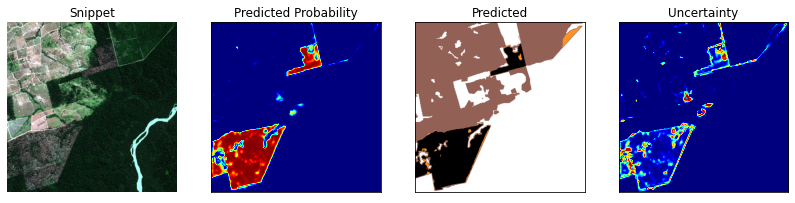

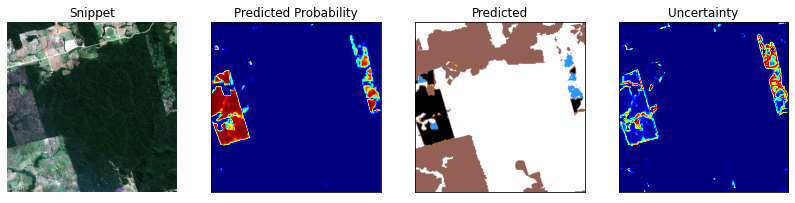

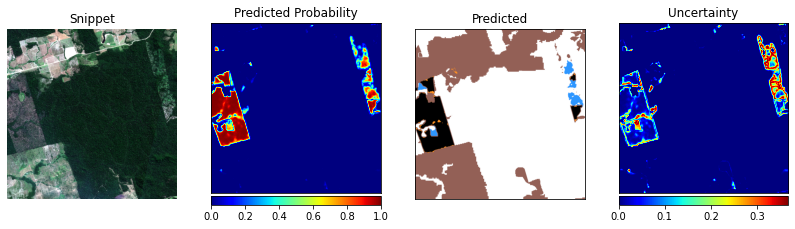

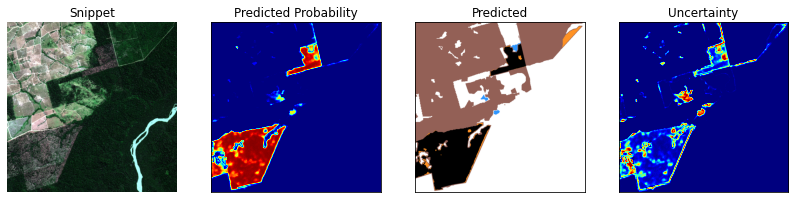

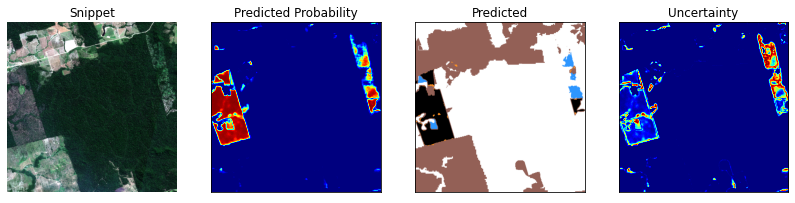

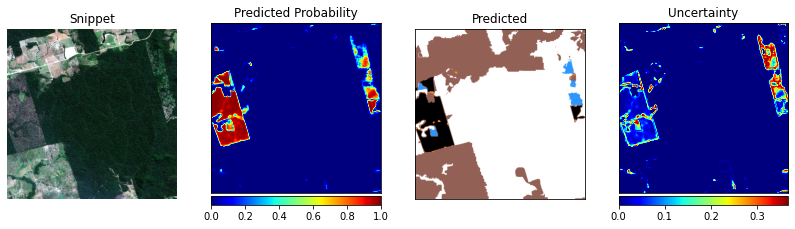

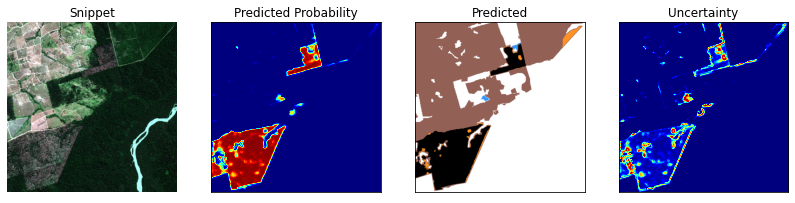

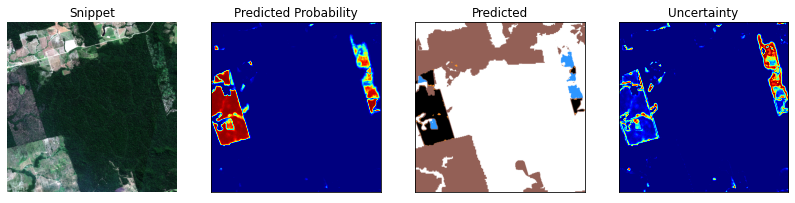

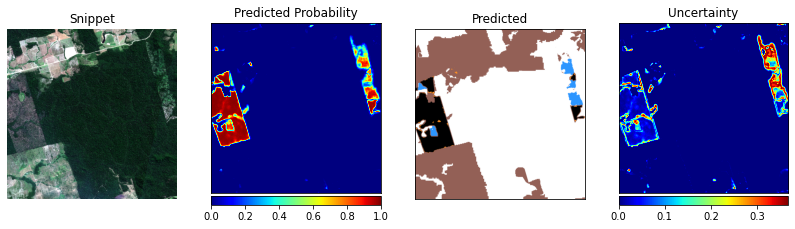

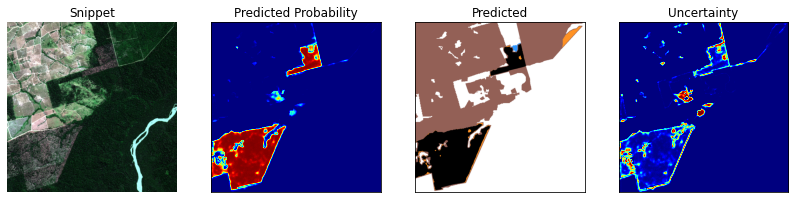

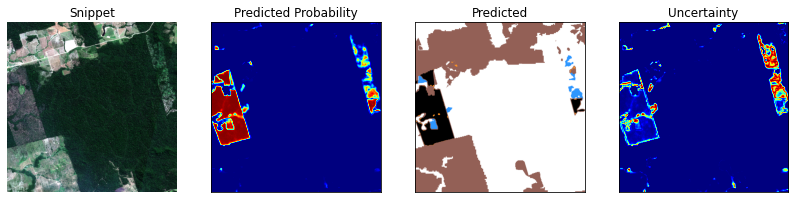

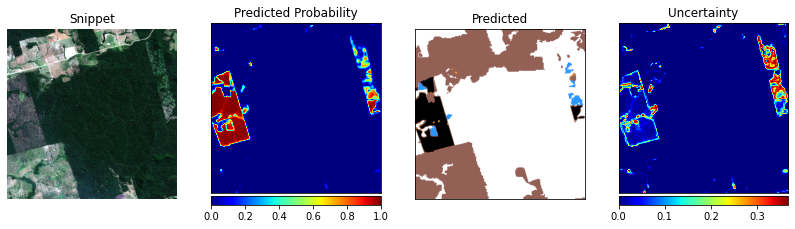

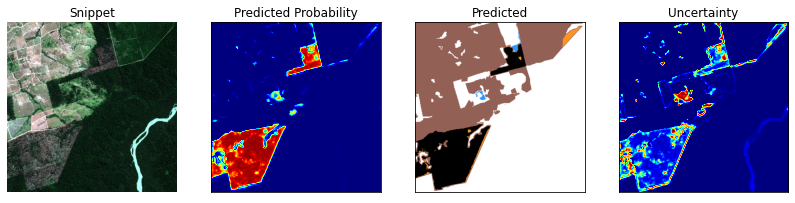

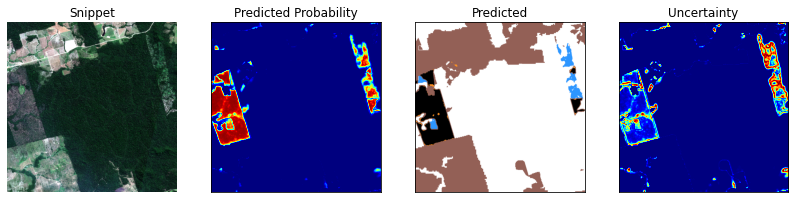

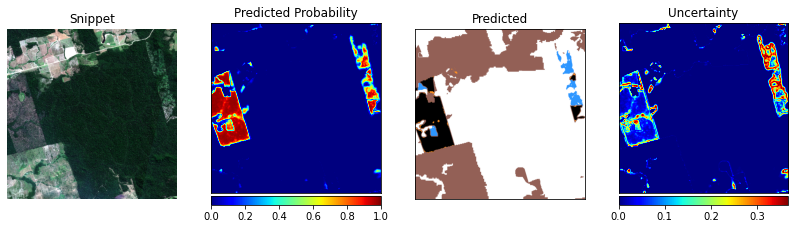

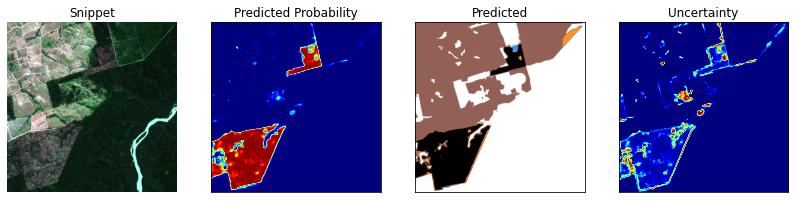

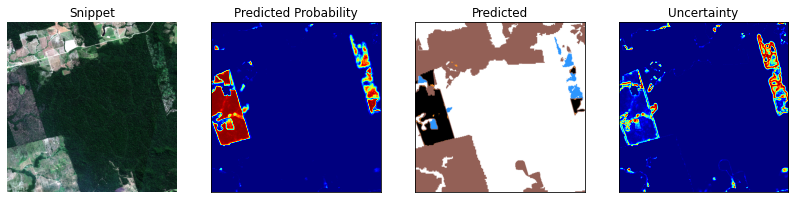

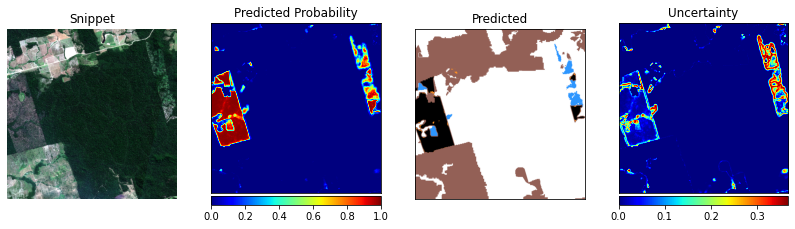

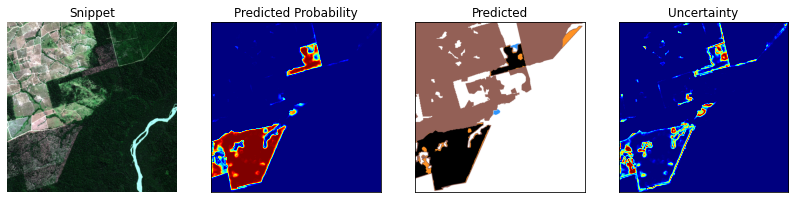

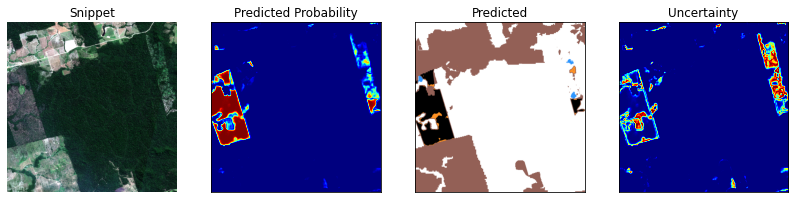

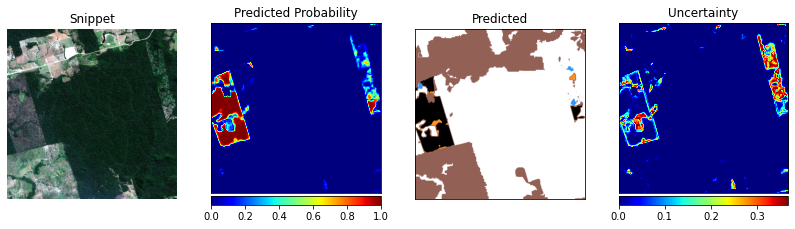

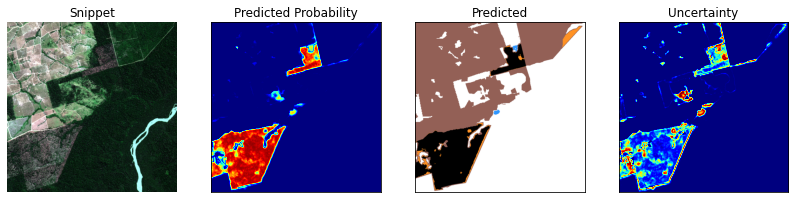

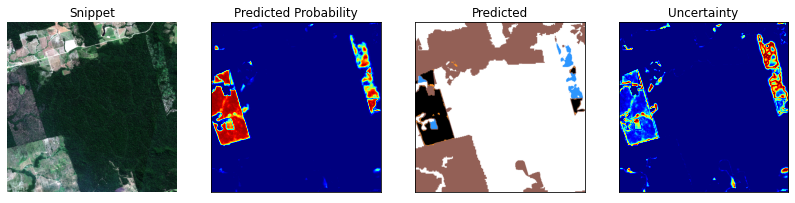

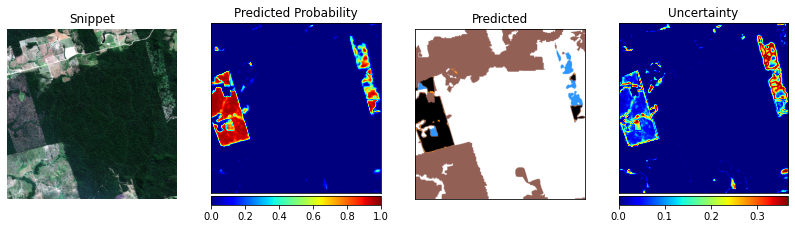

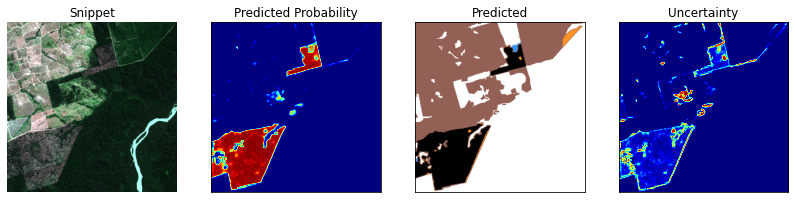

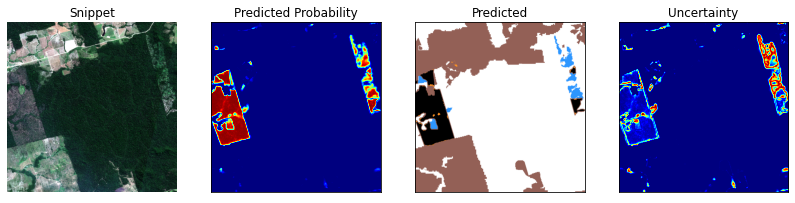

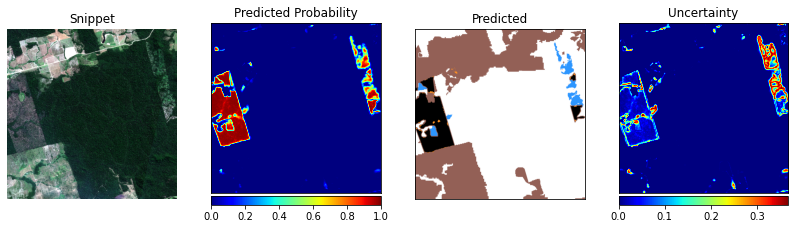

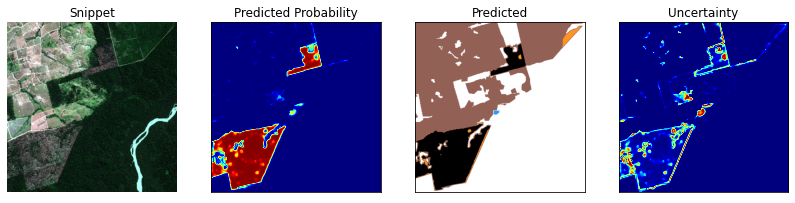

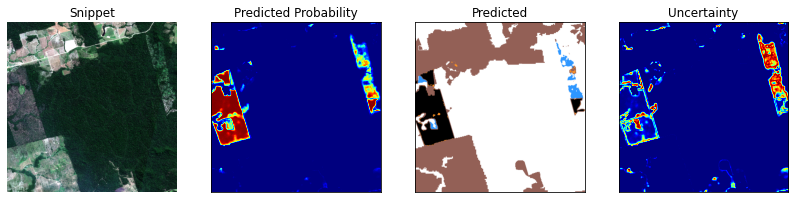

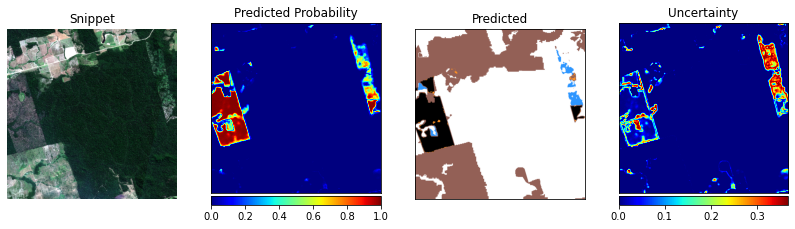

In [9]:
idx = 0
results = []
error_count = 0
while idx < len(exp_ids):
# for experiment_value, exp_id in zip(experiment_values, exp_ids):
    try:
        
        print("Beginning run number {}".format(idx))

        logger = Logger()
        trainer = trainer_class(config, dataset, patchesHandler, logger)

        trainer.defineExperiment(exp_ids[idx])

        trainer.setExperimentPath()
        trainer.createLogFolders()

        trainer.loadDataset()

        # %%
        if config["training"] == True:
            trainer.run()

        # %%
        result = trainer.run_predictor()
        print("Result idx {}: {}".format(idx, result))
        results.append(result)


        with open(trainer.default_log_name, 'wb') as f:
            pickle.dump(results, f)
        idx += 1
        print("Grid execution idx: {}".format(idx))
        error_count = 0
    except Exception as e: 
        print(traceback.format_exc())
        error_count += 1
        if error_count > 10:
            sys.exit()
        print("Execution error in idx {}. Retrying...".format(idx))
        continue

In [10]:
trainer.classes_mode

False

In [11]:
print(results)

[{'other_uncertainty_metrics': {'sUEO': 0.841080483916035, 'ece_score': 0.004285987396271022}, 'snippet_poi_results': [{'snippet_id': 0, 'coords': [550, 550], 'reference': 0, 'predicted': array([[2.48296e-07]], dtype=float32)}, {'snippet_id': 0, 'coords': [210, 610], 'reference': 1, 'predicted': array([[0.4554153]], dtype=float32)}, {'snippet_id': 0, 'coords': [207, 617], 'reference': 1, 'predicted': array([[0.16695404]], dtype=float32)}, {'snippet_id': 0, 'coords': [800, 200], 'reference': 1, 'predicted': array([[0.9783321]], dtype=float32)}, {'snippet_id': 1, 'coords': [550, 115], 'reference': 1, 'predicted': array([[0.37413326]], dtype=float32)}, {'snippet_id': 1, 'coords': [430, 950], 'reference': 0, 'predicted': array([[0.81579924]], dtype=float32)}], 'uncertainty_result': {'metrics': {'precision_L': array([0.98837792]), 'recall_L': array([0.93844698]), 'recall_Ltotal': array([0.51460623]), 'AA': array([0.02999886]), 'precision_H': array([0.72729591]), 'recall_H': array([0.6776247

In [12]:
print(len(results))

10


In [13]:
results[9]

{'other_uncertainty_metrics': {'sUEO': 0.834368756454427,
  'ece_score': 0.007068226813616997},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': array([[8.3934395e-08]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': array([[0.4161476]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [207, 617],
   'reference': 1,
   'predicted': array([[0.13750772]], dtype=float32)},
  {'snippet_id': 0,
   'coords': [800, 200],
   'reference': 1,
   'predicted': array([[0.9828547]], dtype=float32)},
  {'snippet_id': 1,
   'coords': [550, 115],
   'reference': 1,
   'predicted': array([[0.4561578]], dtype=float32)},
  {'snippet_id': 1,
   'coords': [430, 950],
   'reference': 0,
   'predicted': array([[0.8649394]], dtype=float32)}],
 'uncertainty_result': {'metrics': {'precision_L': array([0.98314695]),
   'recall_L': array([0.94452856]),
   'recall_Ltotal': array([0.56975385]),
   'AA': array([0.

In [14]:
trainer.f1

85.93

In [15]:
print(trainer.f1)

85.93
